##**Combine Data Cleaning, Feature Selection, Modeling and Interpretability into one report**


Combine Data Cleaning, Feature Selection, Modeling, and Interpretability into one report (Every assignment except TMINST) and make it a cohesive readable report.<br/>


The focus is readability and clarity.<br/>


The following must be answered:

1. What is the question?<br/>
2. What did you do?<br/>
3. How well did it work?<br/>
4. What did you learn?<br/>

The goal was to clean the data, select the important features and Model interpretability and construct a realistic model to precisely predict the Heart attack based on the features in the dataset. It is generally believed that it’s impossible to precisely predict the heart attack as it depends on various factors. For this dataset all of the given variables are  considered to be dependent variable. First, major factors affecting the heart should be selected. Then, a model for Heart attack prediction should be established. That should be applied to the Heart Attack Analysis & Prediction dataset to test the model. Through the Logistic regression model can effectively predict and analyze the heart attack to some extent as it is a classification problem, while the algorithm can still be improved through more advanced machine learning methods.

**Data Set** <br/>
The data set consists of : <br/>

14 characteristics of the situation that smoke detection at i.e. - The independent variables<br/>
The Target Variable - The dependent variable<br/>
The condition of heart attack is represented by 0 and 1.. <br/>
There are a total of --- observations.<br/>

**Feature details**<br/><br/>

age - Age of the person<br/>
sex - Gender of the person<br/>
cp - Chest Pain type chest pain type<br/>
trtbps - resting blood pressure (in mm Hg)<br/>
chol - cholestoral in mg/dl fetched via BMI sensor
fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) <br/>
restecg - resting electrocardiographic results<br/>
thalachh - maximum heart rate achieved<br/>
exng - exercise induced angina (1 = yes; 0 = no)<br/>
oldpeak - Previous peak<br/>
slp - Slope<br/>
caa - number of major vessels (0-3)<br/>
thall - Thal rate<br/>
output - Target variable<br/>



kaggle -  https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

#**Importing Libraries**

In [123]:
import pandas as pd
import numpy as np
!pip install eli5
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
import math
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.MatplotlibDeprecationWarning)
!pip install h2o
import h2o
from h2o.automl import H2OAutoML
h2o.init()
from sklearn.tree import DecisionTreeRegressor
!pip install shap
import shap
from statsmodels.graphics.gofplots import qqplot
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn import tree
import statsmodels.api as sm

%pip install pycaret
from pycaret.classification import *
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         4 hours 32 mins
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.40.0.3
H2O_cluster_version_age:    5 days
H2O_cluster_name:           H2O_from_python_unknownUser_d8hdo8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.053 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.9.16 final
--------------------------  -----------------------------------------------------------------------------------------

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#**Loading Dataset**

In [124]:
url = "https://raw.githubusercontent.com/devika-boddu/DataScience-Engineering-Methods/main/heart.csv"
data = h2o.import_file(path = url)
df =  pd.read_csv("https://raw.githubusercontent.com/devika-boddu/DataScience-Engineering-Methods/main/heart.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


##**Cleaning data and Checking for null values**

In [125]:
df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [126]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

## **Distribution of feature variables**

<Axes: >

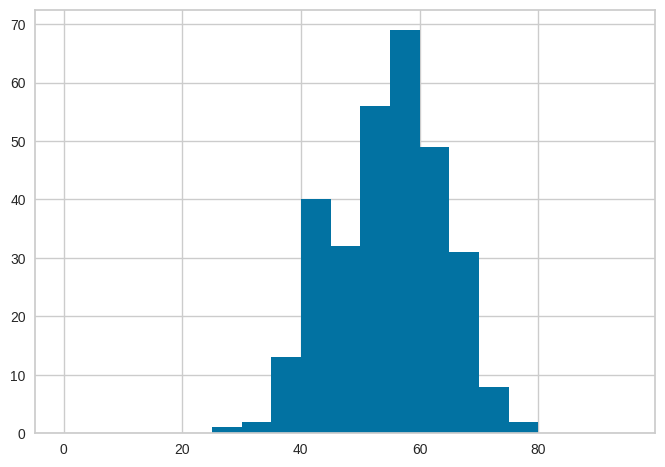

In [127]:
bin_values = np.arange(start = 0, stop = 100, step =5)
df.age.hist(bins=bin_values)

<Axes: >

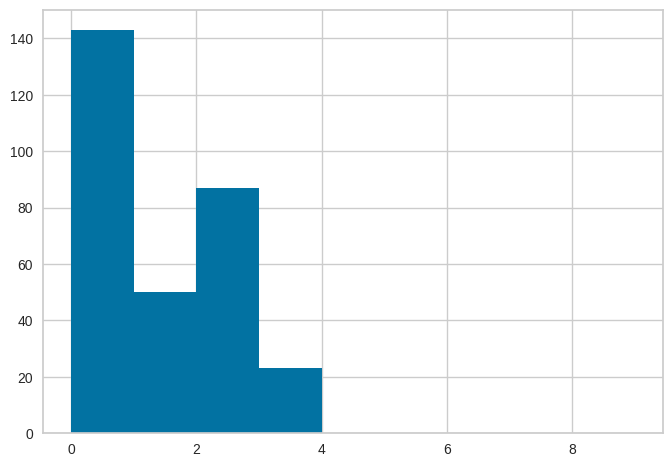

In [128]:
bin_values = np.arange(start = 0, stop = 10, step=1)
df.cp.hist(bins=bin_values)

<Axes: >

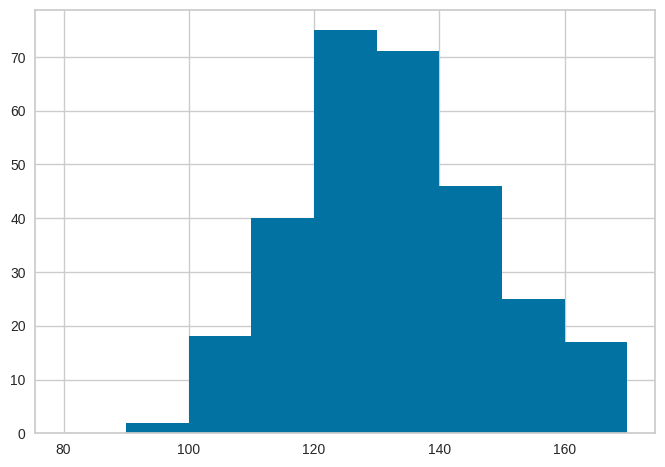

In [129]:
bin_values = np.arange(start = 80, stop = 180, step=10)
df.trtbps.hist(bins=bin_values)

<Axes: >

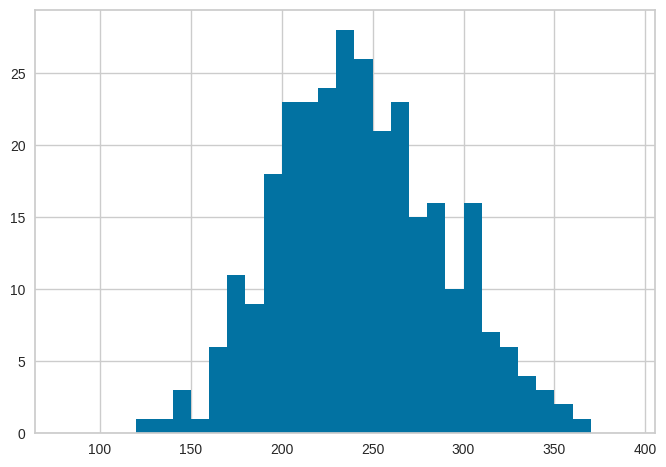

In [130]:
bin_values = np.arange(start = 80, stop = 400, step=10)
df.chol.hist(bins=bin_values)

<Axes: >

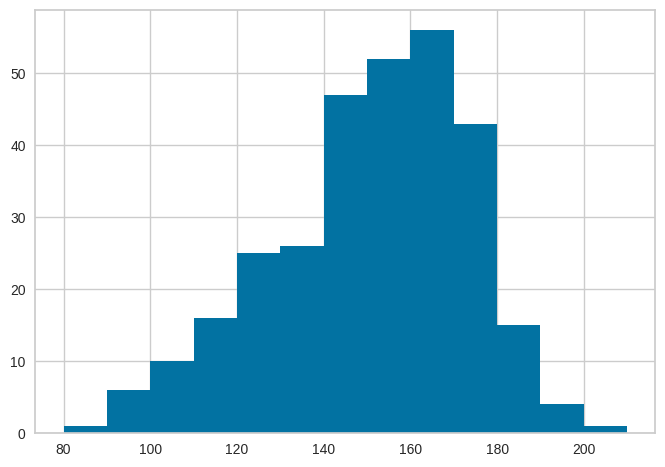

In [131]:
bin_values = np.arange(start = 80, stop = 220, step=10)
df.thalachh.hist(bins=bin_values)

<Axes: >

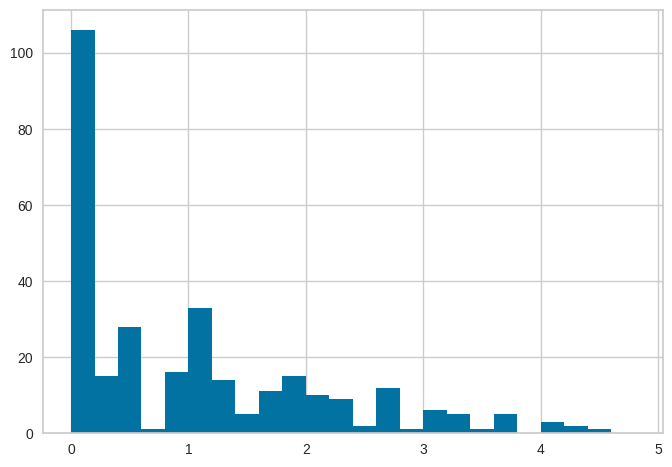

In [132]:
bin_values = np.arange(start = 0, stop = 5, step=0.2)
df.oldpeak.hist(bins=bin_values)

In [133]:
df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

<Figure size 800x500 with 0 Axes>

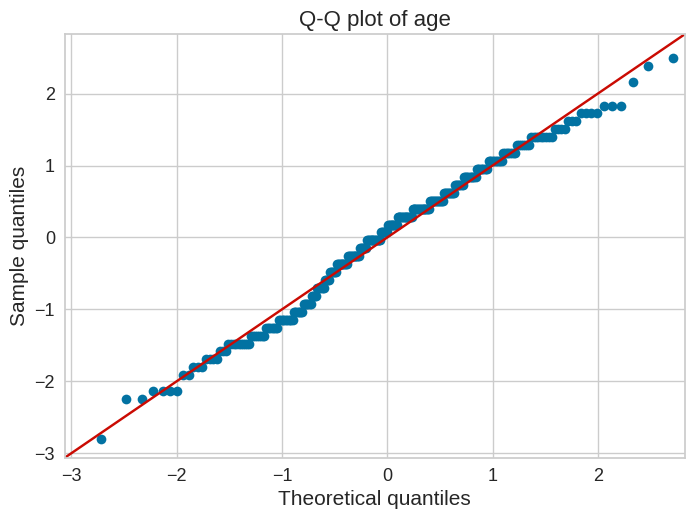

<Figure size 800x500 with 0 Axes>

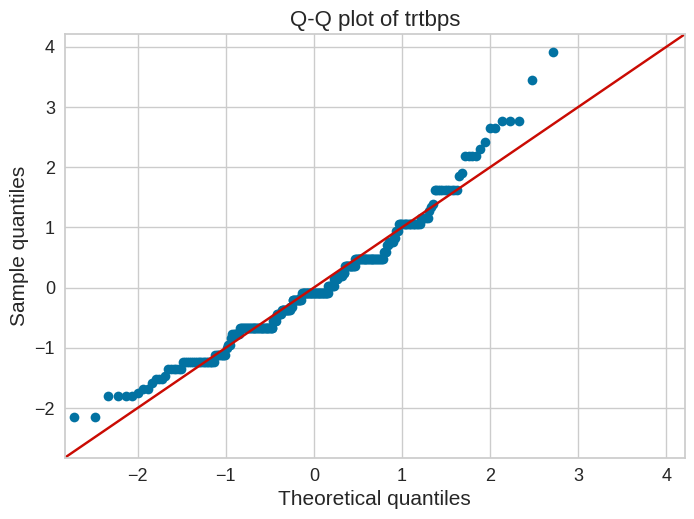

<Figure size 800x500 with 0 Axes>

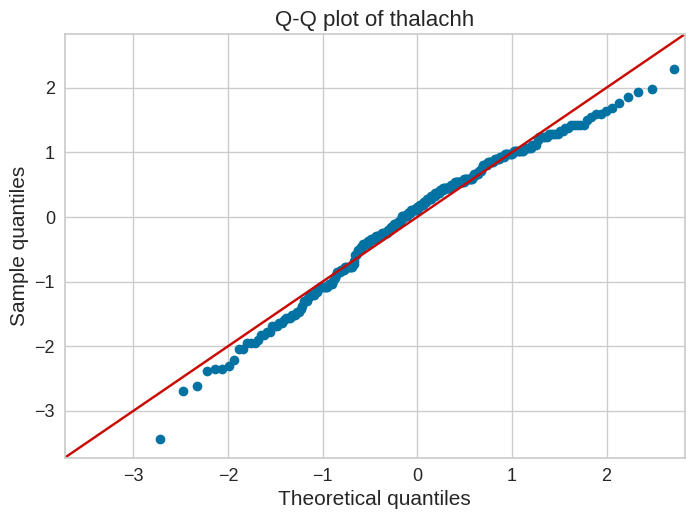

<Figure size 800x500 with 0 Axes>

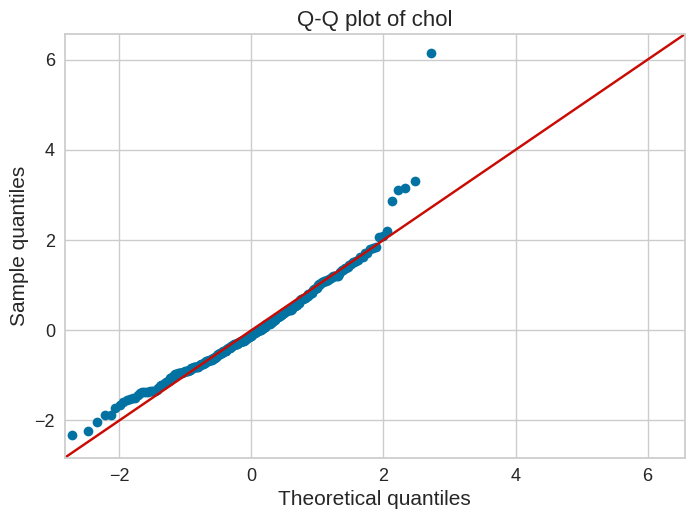

<Figure size 800x500 with 0 Axes>

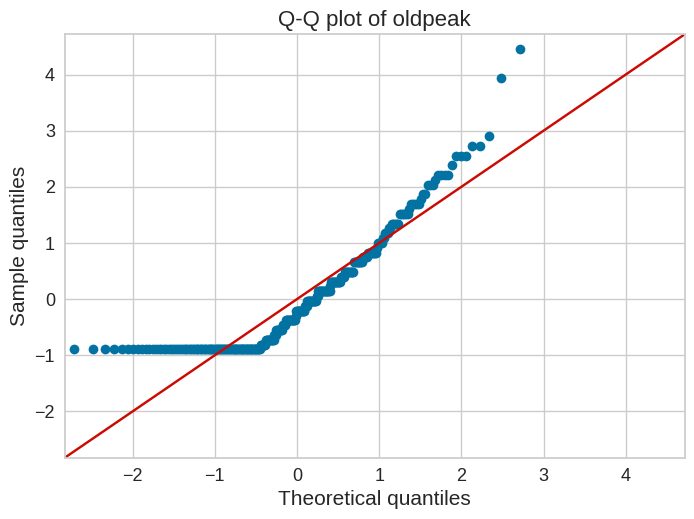

<Figure size 800x500 with 0 Axes>

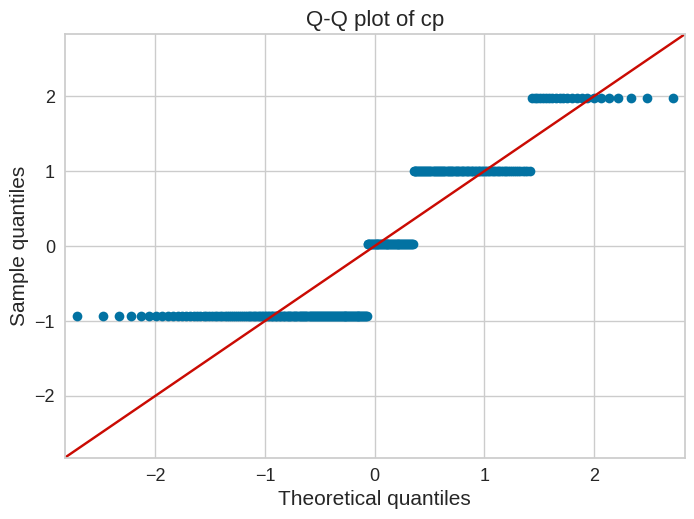

In [134]:
data_norm= df[['age', 'trtbps', 'thalachh','chol','oldpeak','cp']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()  

1. Looking at the Q-Q plot above, it appears that not all independent variables are following normal distribution
2. There are few outliers in few of the predictor variables like in cp.

## **Data transforming, Feature creation and Analysis**

In [135]:
df_dummies = pd.get_dummies(df)

<Axes: >

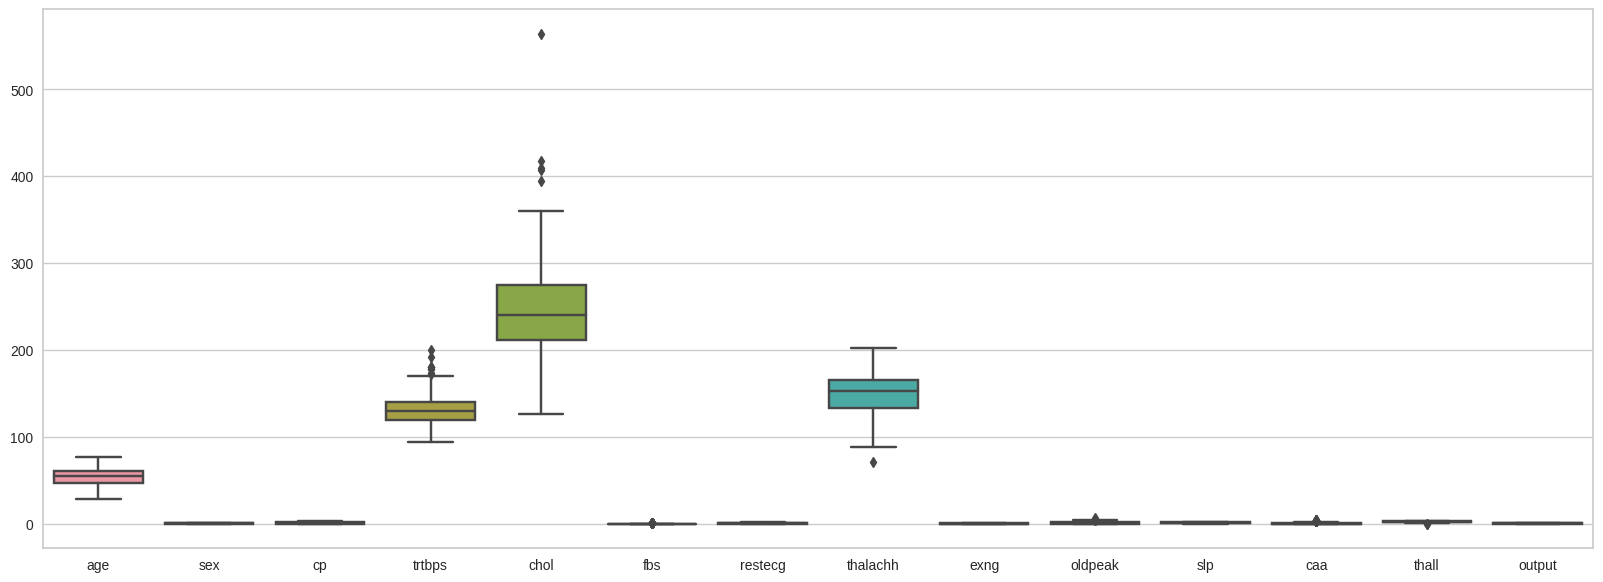

In [136]:
# Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(20,7))
sns.boxplot(data=df_dummies)

It is hard to visualize and read data as they are not in same ranges,trying  to normalize the data for a better understanding and visualization. It will also help later to get normalized coeffiecients when building the Model.

In [137]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

## **Correlation plot**

<Axes: >

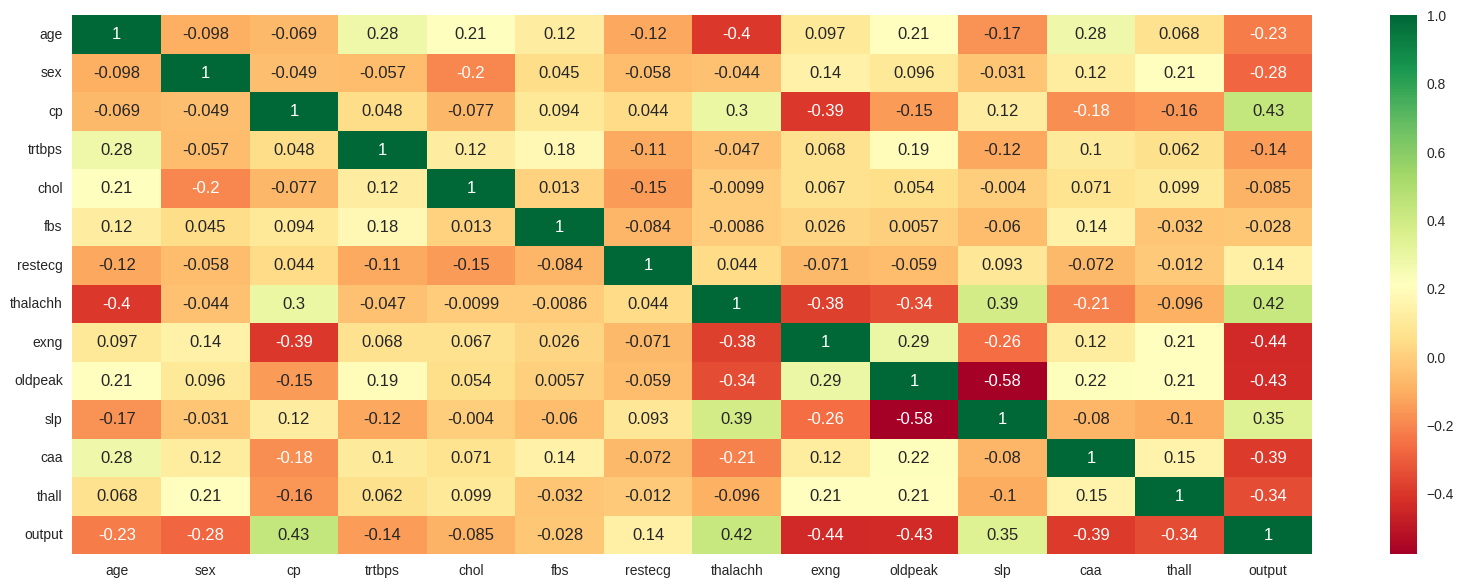

In [138]:
plt.figure(figsize=(20,7))
sns.heatmap(df_dummies.corr(), annot=True, cmap='RdYlGn')

We can see that rarely there is any correlation between the target and independent variables. However, we try to choose those with most correlation factor.<br/>

1.  thalachh.<br/>
2.  cp.<br/>
3.  oldpeak.<br/>
4.  slp.<br/>

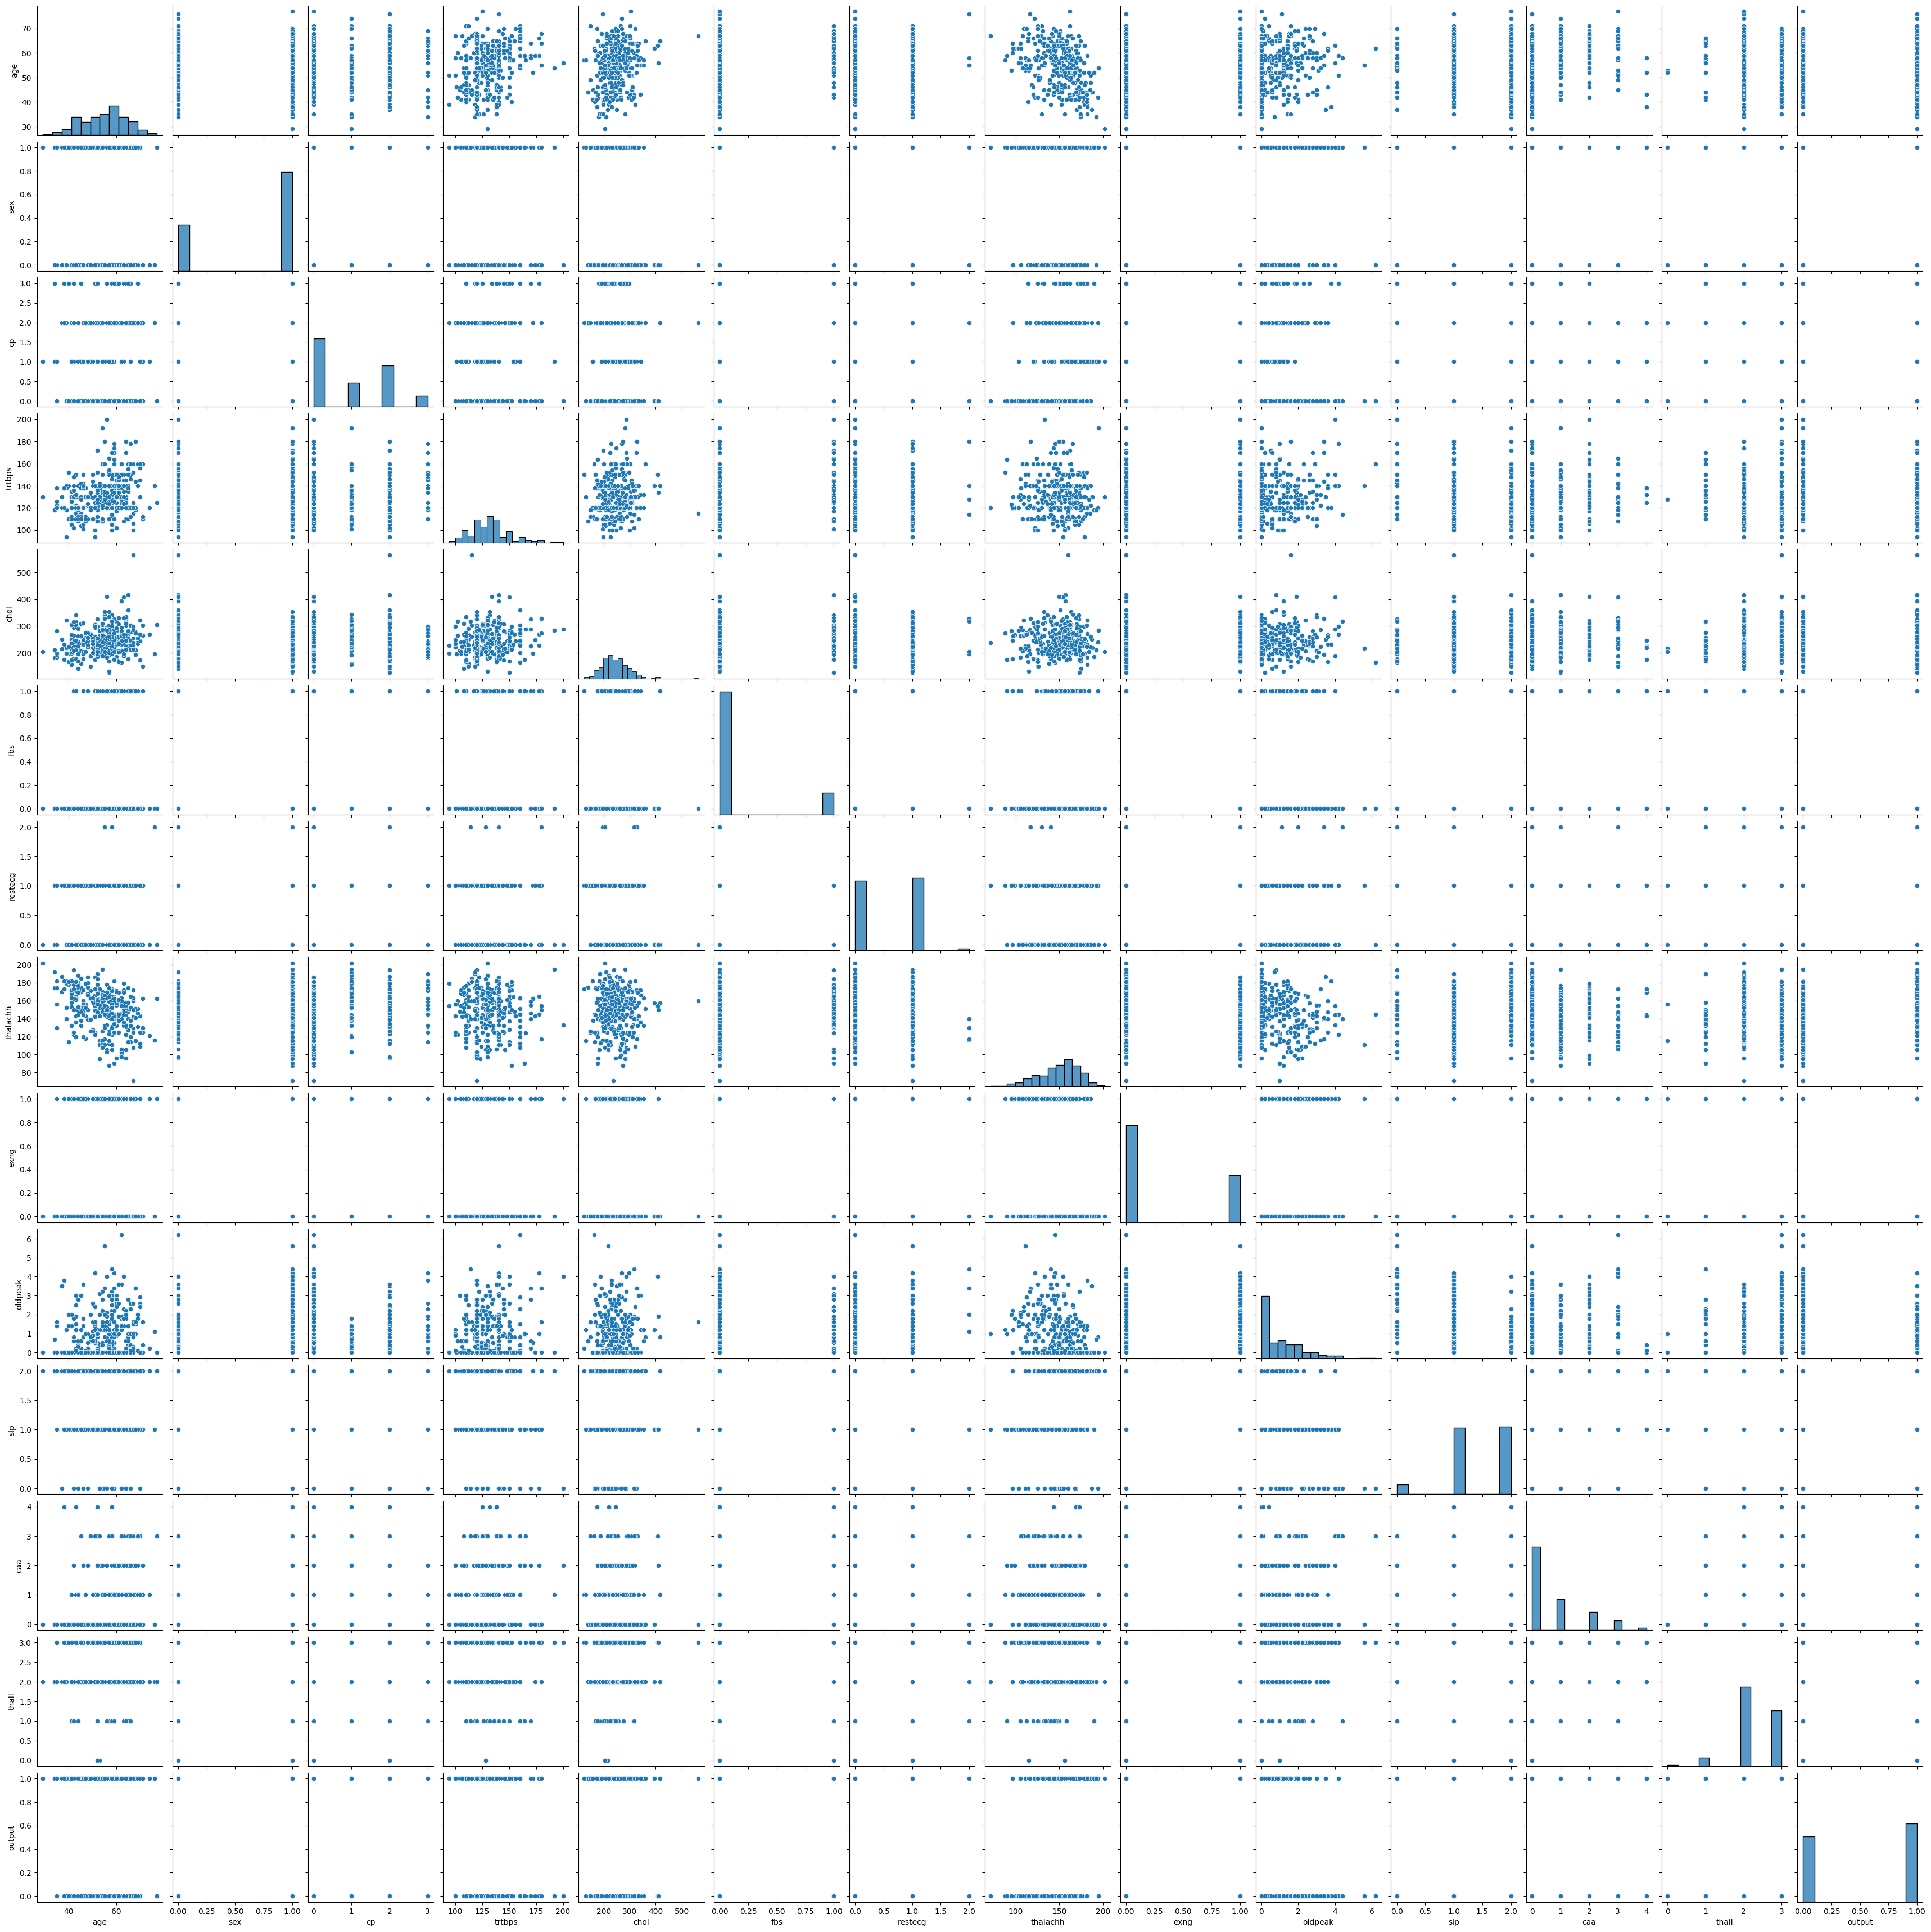

In [39]:
sns.pairplot(df_dummies) 

The pair plot shows that there is dependency between the variables

In [139]:

model = sm.OLS(df['output'], df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']]).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 output   R-squared (uncentered):                   0.774
Model:                            OLS   Adj. R-squared (uncentered):              0.764
Method:                 Least Squares   F-statistic:                              76.48
Date:                Mon, 10 Apr 2023   Prob (F-statistic):                    1.48e-85
Time:                        03:20:02   Log-Likelihood:                         -112.42
No. Observations:                 303   AIC:                                      250.8
Df Residuals:                     290   BIC:                                      299.1
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0031      0.002      1.344      0.180      -0.001       0.008
sex           -0.1696      0.047     -3.626      0.000      -0.262      -0.078
cp             0.1112      0.023      4.910      0.000       0.067       0.156
trtbps        -0.0007      0.001     -0.596      0.552      -0.003       0.002
chol          -0.0001      0.000     -0.316      0.752      -0.001       0.001
fbs            0.0033      0.060      0.055      0.956      -0.115       0.122
restecg        0.0712      0.040      1.794      0.074      -0.007       0.149
thalachh       0.0050      0.001      5.657      0.000       0.003       0.007
exng          -0.1194      0.051     -2.331      0.020      -0.220      -0.019
oldpeak       -0.0542      0.023     -2.344      0.020      -0.100      -0.009
slp            0.0888      0.043      2.077      0.039       0.005       0.173
caa           -0.1046      0.022     -4.737      0.000      -0.148      -0.061
thall         -0.1035      0.036     -2.903      0.004      -0.174      -0.033
==============================================================================
Omnibus:                        8.186   Durbin-Watson:                   1.046
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                8.464
Skew:                          -0.407   Prob(JB):                       0.0145
Kurtosis:                       2.920   Cond. No.                         961.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#**Logistic Regression**

In [140]:
df_train = df

In [141]:
y = df_train['output']
X = df_train[[col for col in df_train.columns if col != 'output']]
#Spliting data into Training, and Test set 
X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=104, train_size=0.8, shuffle=True)

In [142]:
# Create linear regression object
model = linear_model.LogisticRegression()

# Train the model using the training sets
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## **Making Predictions**

In [143]:
# Make predictions using the training set
y_pred = model.predict(X_train)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_train, y_pred))
r2 = r2_score(y_train,y_pred)
print('R^2 score on tarining set =',r2)

Mean squared error: 0.14
Coefficient of determination: 0.44
R^2 score on tarining set = 0.43612938596491224


In [144]:
model = DecisionTreeRegressor(random_state=3, criterion= "squared_error", max_depth= 4)
model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='squared_error', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      random_state=3, splitter='best')

Feature: 0, Score: 0.10115
Feature: 1, Score: 0.09877
Feature: 2, Score: 0.39395
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00222
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.08454
Feature: 10, Score: 0.04231
Feature: 11, Score: 0.16043
Feature: 12, Score: 0.11664


<BarContainer object of 13 artists>

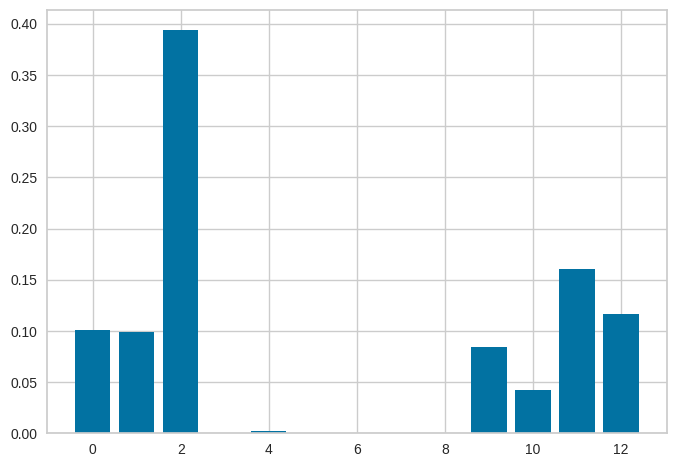

In [145]:
importance = model.feature_importances_
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
#pyplot.show()

Feature 3, Feature 11, Feature 12 are the most significant, while remaining features contributed the model and are less significant

In [146]:
from sklearn.ensemble import GradientBoostingRegressor

In [147]:
model = GradientBoostingRegressor(learning_rate=0.25)
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.25, loss='squared_error',
                          max_depth=3, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_samples_leaf=1,
                          min_samples_split=2, min_weight_fraction_leaf=0.0,
                          n_estimators=100, n_iter_no_change=None,
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

Feature: 0, Score: 0.08485
Feature: 1, Score: 0.05474
Feature: 2, Score: 0.21123
Feature: 3, Score: 0.07734
Feature: 4, Score: 0.06218
Feature: 5, Score: 0.00601
Feature: 6, Score: 0.00466
Feature: 7, Score: 0.06366
Feature: 8, Score: 0.02258
Feature: 9, Score: 0.09033
Feature: 10, Score: 0.05419
Feature: 11, Score: 0.12748
Feature: 12, Score: 0.14074


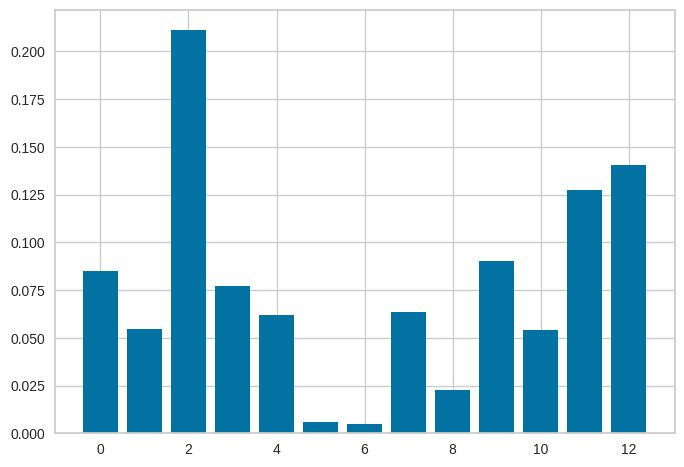

In [148]:
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()


From the analysis done above on the data set, it is clear that there is no multicolinearity and all the dependent variables are significant.<br/>
cp, thall, caa are considered to be more significant based on the predictive models

##**AutoML** 

Automactic Machine Learning or AutoML refers to the automation of various tasks in the machine learning pipeline, including data preprocessing, hyperparameter tuning, model selection, and evaluation.

This notebook explores the use of an <a href="https://docs.h2o.ai/h2o/latest-stable/h2o-docs/index.html"> open-source automated machine learning package from H2O </a>  to speed up the development of models.

In [149]:
data.head()

age    sex    cp    trtbps    chol    fbs    restecg    thalachh    exng    oldpeak    slp    caa    thall    output
-----  -----  ----  --------  ------  -----  ---------  ----------  ------  ---------  -----  -----  -------  --------
   63      1     3       145     233      1          0         150       0        2.3      0      0        1         1
   37      1     2       130     250      0          1         187       0        3.5      0      0        2         1
   41      0     1       130     204      0          0         172       0        1.4      2      0        2         1
   56      1     1       120     236      0          1         178       0        0.8      2      0        2         1
   57      0     0       120     354      0          1         163       1        0.6      2      0        2         1
   57      1     0       140     192      0          1         148       0        0.4      1      0        1         1
   56      0     1       140     294      0          0         153       0        1.3      1      0        2         1
   44      1     1       120     263      0          1         173       0        0        2      0        3         1
   52      1     2       172     199      1          1         162       0        0.5      2      0        3         1
   57      1     2       150     168      0          1         174       0        1.6      2      0        2         1
[10 rows x 14 columns]

In [150]:
data.types

{'age': 'int',
 'sex': 'int',
 'cp': 'int',
 'trtbps': 'int',
 'chol': 'int',
 'fbs': 'int',
 'restecg': 'int',
 'thalachh': 'int',
 'exng': 'int',
 'oldpeak': 'real',
 'slp': 'int',
 'caa': 'int',
 'thall': 'int',
 'output': 'int'}

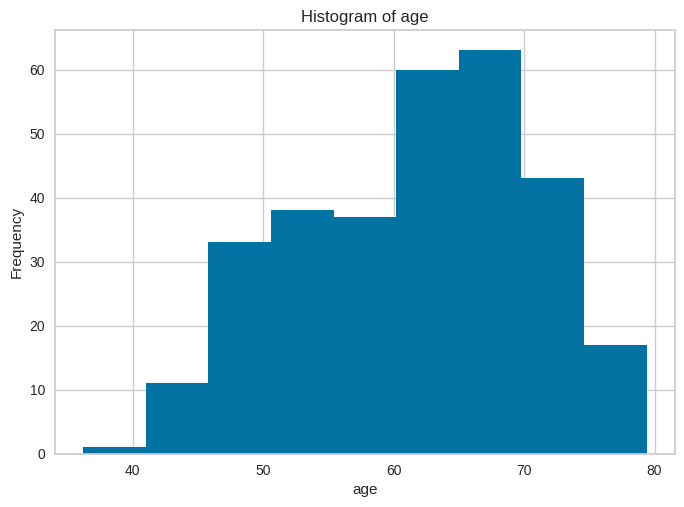

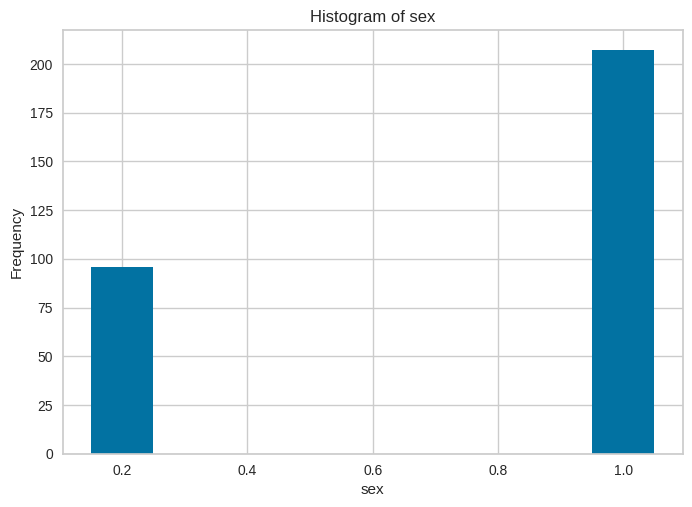

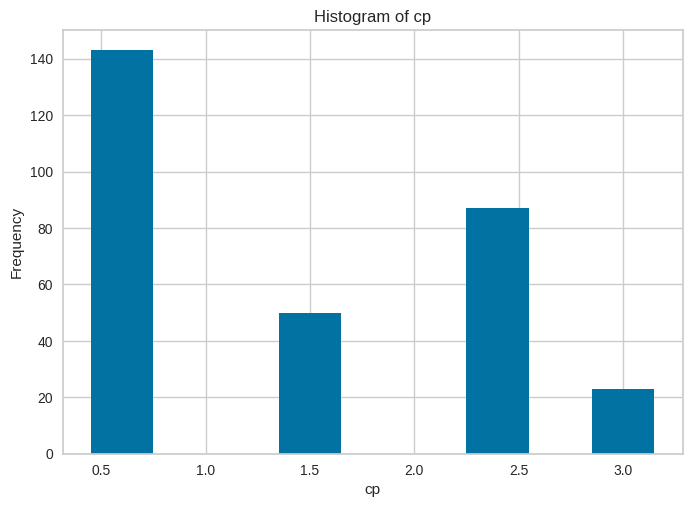

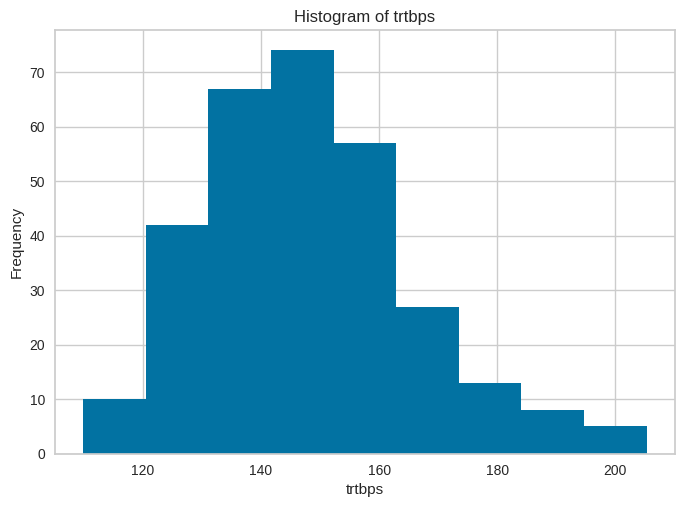

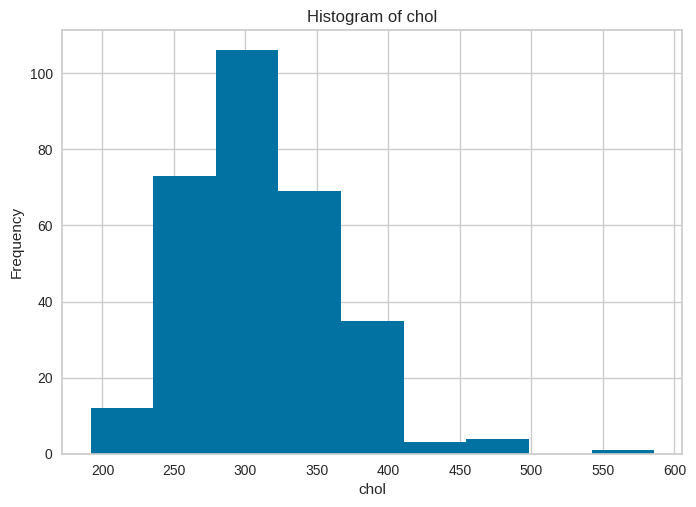

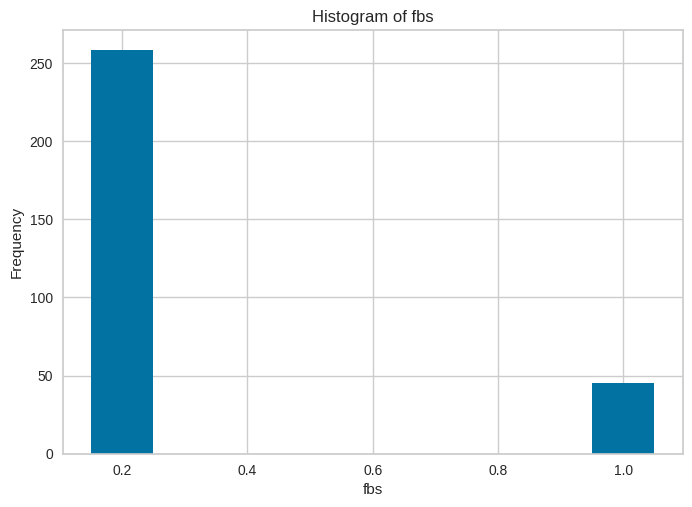

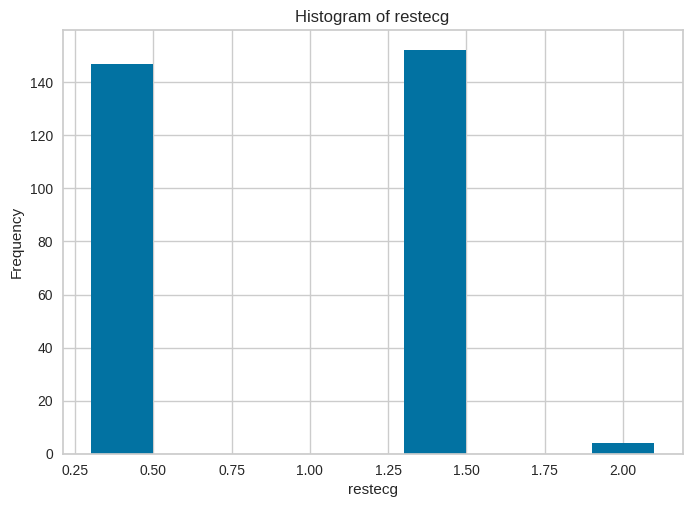

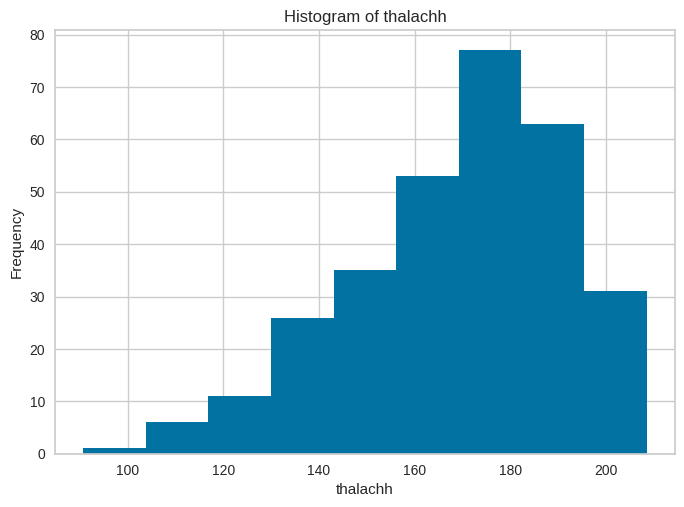

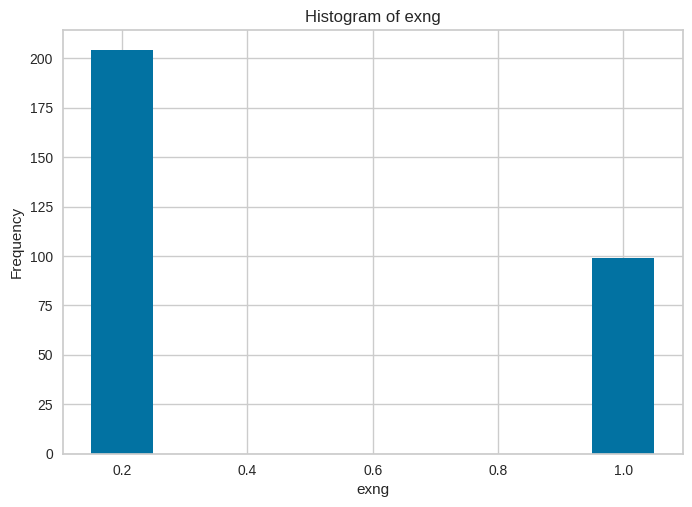

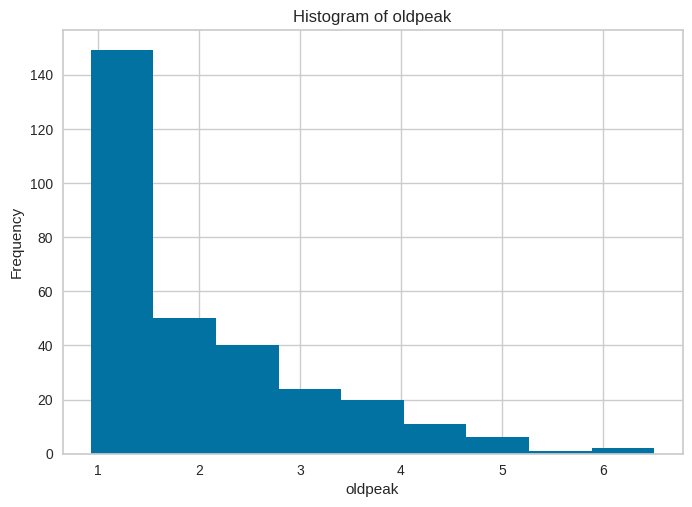

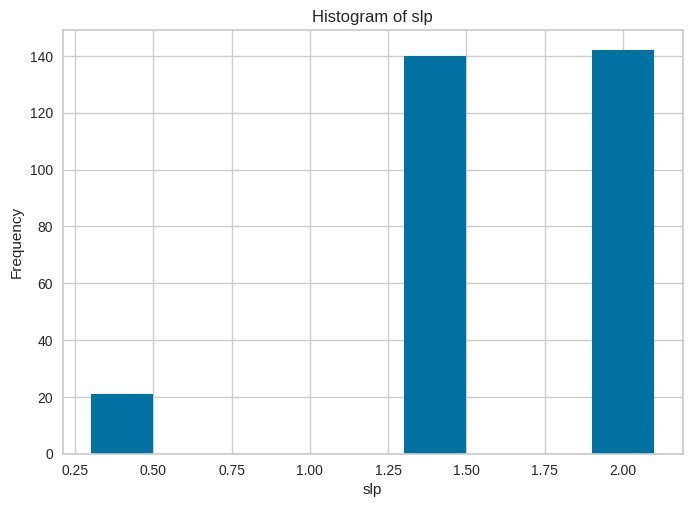

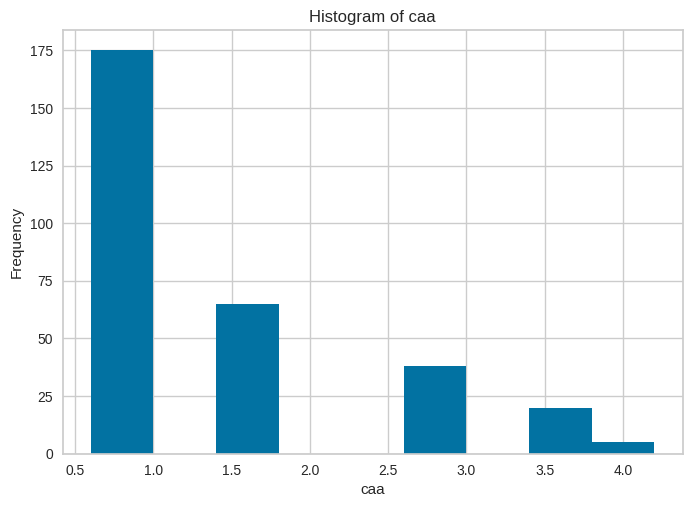

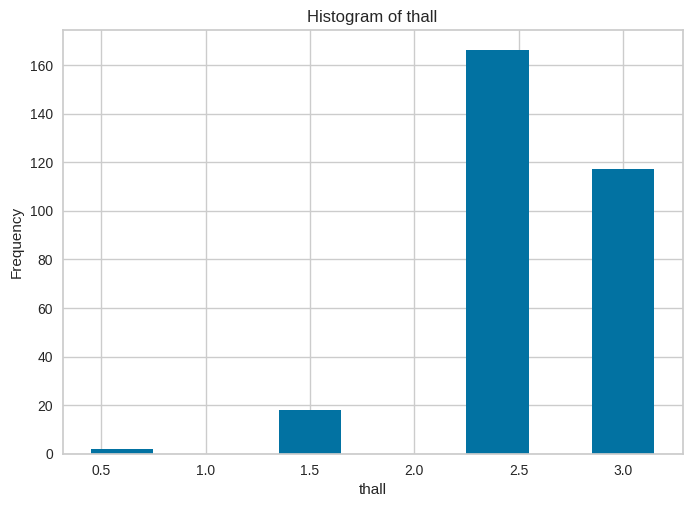

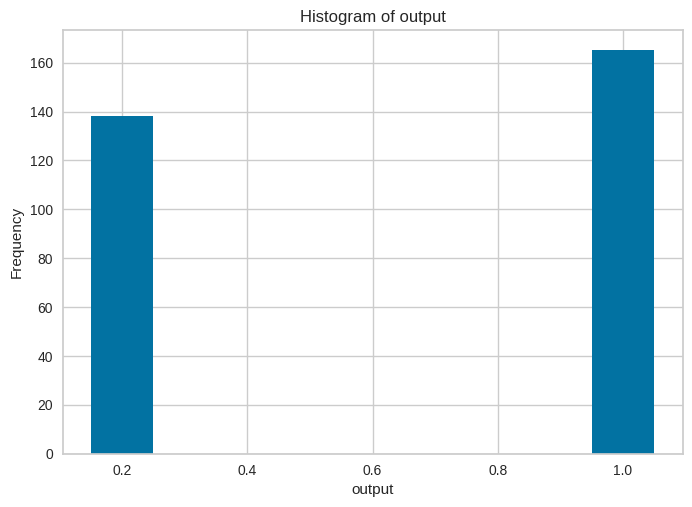

In [151]:
for col in data.columns:
  data[col].hist()

In [152]:
train,test= data.split_frame(ratios=[.8])

In [153]:
response = "output"
train[response] = train[response].asfactor()
test[response] = test[response].asfactor()

In [154]:
predictor= data.columns

In [155]:
predictor.remove("output")

In [156]:
aml= H2OAutoML(max_runtime_secs=180,verbosity="info")
aml.train(predictor,response,train)

AutoML progress: |
03:21:17.471: Project: AutoML_2_20230410_32117
03:21:17.472: 5-fold cross-validation will be used.
03:21:17.472: Setting stopping tolerance adaptively based on the training frame: 0.05
03:21:17.472: Build control seed: -1 (random)
03:21:17.473: training frame: Frame key: AutoML_2_20230410_32117_training_py_658_sid_a166    cols: 14    rows: 241  chunks: 1    size: 4543  checksum: 2689771705076878336
03:21:17.473: validation frame: NULL
03:21:17.473: leaderboard frame: NULL
03:21:17.473: blending frame: NULL
03:21:17.473: response column: output
03:21:17.473: fold column: null
03:21:17.473: weights column: null
03:21:17.479: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (6g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (6g, 10w)]}, {DeepLearning 

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_4_AutoML_2_20230410_32117


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       4/6
# GBM base models (used / total)           1/1
# XGBoost base models (used / total)       1/1
# DeepLearning base models (used / total)  1/1
# GLM base models (used / total)           0/1
# DRF base models (used / total)           1/2
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.07828598452098148
RMSE: 0.2797963268539841
LogLoss: 0.2676801339458533
AUC: 0.9619833544928763
AUCPR: 0.9702812515849035
Gini: 0.9239667089857526
Null degrees of freedom: 240
Residual degrees of freedom: 236
Null deviance: 328.39391462217253
Residual deviance: 129.0218245619013
AIC: 139.0218245619013

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5713370785456677
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      95   7    0.0686   (7.0/102.0)
1      12   127  0.0863   (12.0/139.0)
Total  107  134  0.0788   (19.0/241.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.571337     0.930403  132
max f2                       0.27024      0.939227  166
max f0point5                 0.571337     0.940741  132
max accuracy                 0.571337     0.921162  132
max precision                0.995308     1         0
max recall                   0.0773582    1         198
max specificity              0.995308     1         0
max absolute_mcc             0.571337     0.840313  132
max min_per_class_accuracy   0.571337     0.913669  132
max mean_per_class_accuracy  0.571337     0.922521  132
max tns                      0.995308     102       0
max fns                      0.995308     138       0
max fps                      0.00204454   102       239
max tps                      0.0773582    139       198
max tnr                      0.995308     1         0
max fnr                      0.995308     0.992806  0
max fpr                      0.00204454   1         239
max tpr                      0.0773582    1         198

Gains/Lift Table: Avg response rate: 57.68 %, avg score: 55.95 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0124481                   0.993967           1.73381    1.73381            1                0.994599   1                           0.994599            0.0215827       0.0215827                  73.3813   73.3813            0.0215827
2        0.0207469                   0.992638           1.73381    1.73381            1                0.993582   1                           0.994192            0.0143885       0.0359712                  73.3813   73.3813            0.0359712
3        0.033195                    0.992058           1.73381    1.73381            1                0.992331   1                           0.993494            0.0215827       0.057554                   73.3813   73.3813            0.057554
4        0.0414938                

##**Leaderboard**

In [157]:
lb=aml.leaderboard
print(aml.leaderboard)

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse       mse
StackedEnsemble_BestOfFamily_4_AutoML_2_20230410_32117  0.914445   0.370739  0.935869                0.187932  0.343333  0.117877
GBM_grid_1_AutoML_2_20230410_32117_model_6              0.910284   0.385129  0.933069                0.181725  0.34954   0.122178
GBM_grid_1_AutoML_2_20230410_32117_model_8              0.90979    0.378614  0.93383                 0.174214  0.347824  0.120982
GBM_grid_1_AutoML_2_20230410_32117_model_2              0.906686   0.38629   0.935168                0.202638  0.351906  0.123838
GBM_grid_1_AutoML_2_20230410_32117_model_5              0.905135   0.390374  0.932087                0.211137  0.35392   0.12526
DeepLearning_grid_1_AutoML_2_20230410_32117_model_3     0.90457    0.463087  0.92183                 0.169629  0.355578  0.126436
GBM_grid_1_AutoML_2_20230410_32117_model_13             0.903371   0.396194  0.928921      

The models here are listed based on the AUC metric. Although there are multiple sort metrics to sort and score each models, we are sticking to the default one here. That is AUC for a binary classification problem and mean_per_class_error for multinomial classification. In our case it is a binary classification problem.

**Observation from the leaderboard:**


1.   GBM_grid_1_AutoML_1_20230217_05321_model_12 is the best performing model with an AUC of 0.923

2.   While the second and third are almost similarly succesful in classifying with an AUC of 0.921 <br/>

Note: Since this a binary classification problem we are checking our AUC but in any other case of a multinominal classification problem we would consider the MPCE


In [158]:
lb.head()

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse       mse
------------------------------------------------------  --------  ---------  --------  ----------------------  --------  --------
StackedEnsemble_BestOfFamily_4_AutoML_2_20230410_32117  0.914445   0.370739  0.935869                0.187932  0.343333  0.117877
GBM_grid_1_AutoML_2_20230410_32117_model_6              0.910284   0.385129  0.933069                0.181725  0.34954   0.122178
GBM_grid_1_AutoML_2_20230410_32117_model_8              0.90979    0.378614  0.93383                 0.174214  0.347824  0.120982
GBM_grid_1_AutoML_2_20230410_32117_model_2              0.906686   0.38629   0.935168                0.202638  0.351906  0.123838
GBM_grid_1_AutoML_2_20230410_32117_model_5              0.905135   0.390374  0.932087                0.211137  0.35392   0.12526
DeepLearning_grid_1_AutoML_2_20230410_32117_model_3     0.90457    0.463087  0.92183                 0.169629  0.355578  0.126436
GBM_grid_1_AutoML_2_20230410_32117_model_13             0.903371   0.396194  0.928921                0.171287  0.35501   0.126032
GBM_grid_1_AutoML_2_20230410_32117_model_1              0.902948   0.394717  0.931803                0.205918  0.357316  0.127675
StackedEnsemble_AllModels_2_AutoML_2_20230410_32117     0.902807   0.394265  0.926784                0.168994  0.353882  0.125233
GBM_grid_1_AutoML_2_20230410_32117_model_11             0.901255   0.394588  0.927389                0.175201  0.354603  0.125743
[10 rows x 7 columns]

 **Analysing relation between all variables**<br/>

When all independent variables were plotted against 'output' variable it is observed that there is no linear relationship between any of the variables.<br/>

VIF stands for Variance Inflation Factor.It signifies multicollinearity among set of different independent variable. A value greater than 10 means that the independent variable is highly correlated with some other variable. Will calculate VIF value for all variables to check the dependency and then will drop the variables with high VIF value.<br/>

In [159]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Indicate which variables to compute VIF
Multic = df[['age',
 'sex',
 'cp',
 'trtbps',
 'chol',
 'fbs',
 'restecg',
 'thalachh',
 'exng',
 'oldpeak',
 'slp',
 'caa',
 'thall']]
#Compute VIF
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]
vif

variables        VIF
0        age  38.998305
1        sex   3.523211
2         cp   2.414403
3     trtbps  58.557335
4       chol  26.267365
5        fbs   1.268205
6    restecg   2.058206
7   thalachh  42.742178
8       exng   2.022527
9    oldpeak   3.062890
10       slp  10.072734
11       caa   1.808925
12     thall  17.165303

VIF for age , trtbps, thalachh, chol is greater than 10, indicates that there is an existence of multicollinearity in the data <br/>

VIF for 'trtbps','age','Longtitude','chol', 'thal', and 'thalachh' is greater than 10. Not dropping any of the variables as for a person to determine the probability of heart-attack, all these variables are necessary

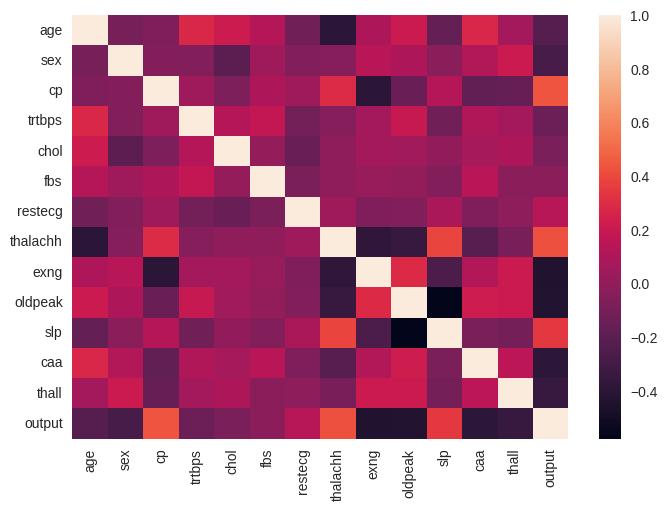

In [160]:
cor = sns.heatmap(df.corr())

[thlachh, age], [exng, cp], [oldpeak,slp] --> these pairs have multicollinearity

In [161]:
mdl_idx=0
gbm_idx=0
#glm_model = ""
aml_leaderboard_df = aml.leaderboard.as_data_frame()
models_dict = {}
for m in aml_leaderboard_df["model_id"]:
    models_dict[m] = gbm_idx
    if "GBM" not in m:
        break
    gbm_idx = gbm_idx + 1

for m in aml_leaderboard_df["model_id"]:
    if "StackedEnsemble" in m:
        models_dict[m] = mdl_idx
        break
    mdl_idx = mdl_idx + 1
models_dict

{'StackedEnsemble_BestOfFamily_4_AutoML_2_20230410_32117': 0}

In [164]:
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
import matplotlib.cbook

warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

In [165]:
aml.leaderboard[:5,"model_id"]

model_id
------------------------------------------------------
StackedEnsemble_BestOfFamily_4_AutoML_2_20230410_32117
GBM_grid_1_AutoML_2_20230410_32117_model_6
GBM_grid_1_AutoML_2_20230410_32117_model_8
GBM_grid_1_AutoML_2_20230410_32117_model_2
GBM_grid_1_AutoML_2_20230410_32117_model_5
[5 rows x 1 column]

In [168]:
m = h2o.get_model(lb[0,"model_id"])

In [170]:
#m.varimp_plot()

The above Variable Importance Graph  is based on H2o's Gradient Boosting Machine. 
Key Takeaways:


1.   "cp" Chest pain type is the most important variable of all.
2.   "caa" is very close to "cp" with an importance of 0.85


In [171]:
heart_glm = H2OGeneralizedLinearEstimator(family="auto",lambda_=0, compute_p_values=True, nfolds=10)
# RIDGE Regularization
heart_glm_regularization_ridge = H2OGeneralizedLinearEstimator(family="auto", alpha=0, nfolds=10)
 # LASSO Regularization
heart_gm_regularization_lasso = H2OGeneralizedLinearEstimator(family="auto", alpha=1, nfolds=10) 
# Lambda Search
heart_glm_regularization_lambda_search = H2OGeneralizedLinearEstimator(lambda_search=True)

In [172]:
heart_glm.train(predictor,response,train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1681080099772_14696


GLM Model: summary
    family    link    regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   None              13                            13                             6                       py_658_sid_a166

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.10363751429259029
RMSE: 0.3219278091320945
LogLoss: 0.3411297850142739
AUC: 0.9279164903371421
AUCPR: 0.9442933182250699
Gini: 0.8558329806742841
Null degrees of freedom: 240
Residual degrees of freedom: 227
Null deviance: 328.39391462217253
Residual deviance: 164.42455637688002
AIC: 192.42455637688002

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5494941415096023
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      82   20   0.1961   (20.0/102.0)
1      10   129  0.0719   (10.0/139.0)
Total  92   149  0.1245   (30.0/241.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.549494     0.895833  147
max f2                       0.389476     0.92437   156
max f0point5                 0.709585     0.904685  119
max accuracy                 0.549494     0.875519  147
max precision                0.997388     1         0
max recall                   0.0177439    1         218
max specificity              0.997388     1         0
max absolute_mcc             0.549494     0.744422  147
max min_per_class_accuracy   0.607885     0.843137  133
max mean_per_class_accuracy  0.549494     0.86599   147
max tns                      0.997388     102       0
max fns                      0.997388     138       0
max fps                      0.000696952  102       239
max tps                      0.0177439    139       218
max tnr                      0.997388     1         0
max fnr                      0.997388     0.992806  0
max fpr                      0.000696952  1         239
max tpr                      0.0177439    1         218

Gains/Lift Table: Avg response rate: 57.68 %, avg score: 77.12 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0124481                   1.2677             0.577938  0.577938           0.333333         1.34603   0.333333                    1.34603             0.00719424      0.00719424                 -42.2062  -42.2062           -0.0124136
2        0.0207469                   1.16175            0         0.346763           0                1.19853   0.2                         1.28703             0               0.00719424                 -100      -65.3237           -0.0320214
3        0.033195                    1.13372            0.577938  0.433453           0.333333         1.14587   0.25                        1.23409             0.00719424      0.0143885                  -42.2062  -56.6547           -0.044435
4        0.0414938                   1.10161            0         0.346763           0                1.11704   0.2                         1.21068             0               0.0143885                  -100      -65.3237           -0.0640429
5        0.0539419                   1.09503            0         0.2667

In [173]:
#Ridge regression
heart_glm_regularization_ridge.train(predictor,response,train)


glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1681080099772_14729


GLM Model: summary
    family    link    regularization               number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  ---------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Ridge ( lambda = 2.304E-4 )  13                            13                             5                       py_658_sid_a166

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.10367662842278164
RMSE: 0.32198855324806447
LogLoss: 0.34113218108428894
AUC: 0.9279164903371421
AUCPR: 0.9442933182250699
Gini: 0.8558329806742841
Null degrees of freedom: 240
Residual degrees of freedom: 227
Null deviance: 328.39391462217253
Residual deviance: 164.42571128262728
AIC: 192.42571128262728

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5497480294041465
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      82   20   0.1961   (20.0/102.0)
1      10   129  0.0719   (10.0/139.0)
Total  92   149  0.1245   (30.0/241.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.549748     0.895833  147
max f2                       0.39028      0.92437   156
max f0point5                 0.709424     0.904685  119
max accuracy                 0.549748     0.875519  147
max precision                0.99732      1         0
max recall                   0.0180794    1         218
max specificity              0.99732      1         0
max absolute_mcc             0.549748     0.744422  147
max min_per_class_accuracy   0.608533     0.843137  133
max mean_per_class_accuracy  0.549748     0.86599   147
max tns                      0.99732      102       0
max fns                      0.99732      138       0
max fps                      0.000719665  102       239
max tps                      0.0180794    139       218
max tnr                      0.99732      1         0
max fnr                      0.99732      0.992806  0
max fpr                      0.000719665  1         239
max tpr                      0.0180794    1         218

Gains/Lift Table: Avg response rate: 57.68 %, avg score: 57.68 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0124481                   0.996175           1.73381    1.73381            1                0.996669    1                           0.996669            0.0215827       0.0215827                  73.3813   73.3813            0.0215827
2        0.0207469                   0.995487           1.73381    1.73381            1                0.995776    1                           0.996312            0.0143885       0.0359712                  73.3813   73.3813            0.0359712
3        0.033195                    0.994931           1.73381    1.73381            1                0.995337    1                           0.995946            0.0215827       0.057554                   73.3813   73.3813            0.057554
4        0.0414938                   0.991011           1.73381    1.73381            1                0.992919    1                           0.995341            0.0143885       0.0719424                  73.3813   73.3813            0.0719424
5        0.0539419     

In [174]:
#Lasso Regression
heart_gm_regularization_lasso.train(predictor,response,train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1681080099772_14762


GLM Model: summary
    family    link    regularization              number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  --------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Lasso (lambda = 2.304E-4 )  13                            13                             5                       py_658_sid_a166

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.10371257910431599
RMSE: 0.3220443744335802
LogLoss: 0.34113682304806486
AUC: 0.9279870221469884
AUCPR: 0.9443091967170621
Gini: 0.8559740442939767
Null degrees of freedom: 240
Residual degrees of freedom: 227
Null deviance: 328.39391462217253
Residual deviance: 164.42794870916725
AIC: 192.42794870916725

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5510085031433787
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      82   20   0.1961   (20.0/102.0)
1      10   129  0.0719   (10.0/139.0)
Total  92   149  0.1245   (30.0/241.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.551009     0.895833  147
max f2                       0.389831     0.92437   156
max f0point5                 0.708877     0.904685  119
max accuracy                 0.551009     0.875519  147
max precision                0.997291     1         0
max recall                   0.0182144    1         218
max specificity              0.997291     1         0
max absolute_mcc             0.551009     0.744422  147
max min_per_class_accuracy   0.60754      0.843137  133
max mean_per_class_accuracy  0.551009     0.86599   147
max tns                      0.997291     102       0
max fns                      0.997291     138       0
max fps                      0.000735548  102       239
max tps                      0.0182144    139       218
max tnr                      0.997291     1         0
max fnr                      0.997291     0.992806  0
max fpr                      0.000735548  1         239
max tpr                      0.0182144    1         218

Gains/Lift Table: Avg response rate: 57.68 %, avg score: 57.68 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0124481                   0.996124           1.73381    1.73381            1                0.996628    1                           0.996628            0.0215827       0.0215827                  73.3813   73.3813            0.0215827
2        0.0207469                   0.995436           1.73381    1.73381            1                0.995733    1                           0.99627             0.0143885       0.0359712                  73.3813   73.3813            0.0359712
3        0.033195                    0.99487            1.73381    1.73381            1                0.995284    1                           0.995901            0.0215827       0.057554                   73.3813   73.3813            0.057554
4        0.0414938                   0.990923           1.73381    1.73381            1                0.992838    1                           0.995288            0.0143885       0.0719424                  73.3813   73.3813            0.0719424
5        0.0539419         

Regularization is a process of adding penalty to our objective function. This is generally done to avoid overfitting in a model. After we regularise our model, the algorithm significantly avoids capturing additional noise. <br/>
    For our data, we compared all 3 different iterations : Lasso Regression, Ridge Regression, Non-regularised 
    Lasso regression improved the AUC when compared to others

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                              auc    logloss     aucpr    mean_per_class_error      rmse       mse    training_time_ms    predict_time_per_row_ms  algo
-----------------------------------------------  --------  ---------  --------  ----------------------  --------  --------  ------------------  -------------------------  -------
GBM_4_AutoML_2_20230410_32117                    0.946581   0.34261   0.916719               0.0833333  0.321115  0.103115                 113                   0.112801  GBM
XGBoost_grid_1_AutoML_2_20230410_32117_model_6   0.945513   0.325595  0.91251                0.111111   0.317118  0.100564                 149                   0.104083  XGBoost
GBM_grid_1_AutoML_2_20230410_32117_model_8       0.939103   0.339359  0.911009               0.111111   0.323926  0.104928                 214                   0.115465  GBM
GBM_grid_1_AutoML_2_20230410_32117_model_10      0.939103   0.363123  0.907862               0.102564   0.333891  0.111483                 124                   0.106279  GBM
GBM_grid_1_AutoML_2_20230410_32117_model_9       0.938034   0.350948  0.894835               0.0972222  0.323671  0.104763                 123                   0.113226  GBM
XGBoost_grid_1_AutoML_2_20230410_32117_model_38  0.934829   0.349496  0.907398               0.121795   0.332033  0.110246                 125                   0.110689  XGBoost
GBM_2_AutoML_2_20230410_32117                    0.932692   0.355285  0.87638                0.0972222  0.324988  0.105617                 159                   0.106862  GBM
XGBoost_grid_1_AutoML_2_20230410_32117_model_22  0.932692   0.368343  0.889301               0.130342   0.336796  0.113431                 167                   0.104467  XGBoost
GBM_grid_1_AutoML_2_20230410_32117_model_7       0.931624   0.349023  0.890223               0.116453   0.326114  0.10635                  270                   0.132075  GBM
GBM_grid_1_AutoML_2_20230410_32117_model_1       0.930556   0.363567  0.903807               0.130342   0.336864  0.113477                 131                   0.118745  GBM
GBM_grid_1_AutoML_2_20230410_32117_model_3       0.930556   0.373734  0.89353                0.116453   0.340256  0.115774                  88                   0.112319  GBM
XGBoost_grid_1_AutoML_2_20230410_32117_model_27  0.929487   0.370825  0.897964               0.130342   0.340277  0.115788                 112                   0.100759  XGBoost
XGBoost_3_AutoML_2_20230410_32117                0.929487   0.379136  0.88746                0.0972222  0.336928  0.11352                  120                   0.110211  XGBoost
XGBoost_grid_1_AutoML_2_20230410_32117_model_31  0.928419   0.362693  0.874806               0.107906   0.32609   0.106335                1372                   0.09969   XGBoost
XGBoost_grid_1_AutoML_2_20230410_32117_model_40  0.928419   0.370383  0.893517               0.111111   0.33586   0.112802                1447                   0.110534  XGBoost
XGBoost_grid_1_AutoML_2_20230410_32117_model_5   0.92735    0.361232  0.886681               0.111111   0.334396  0.111821                 165                   0.107434  XGBoost
GBM_grid_1_AutoML_2_20230410_32117_model_17      0.926282   0.377489  0.893461               0.111111   0.344012  0.118345                 147                   0.112584  GBM
GBM_3_AutoML_2_20230410_32117                    0.926282   0.367067  0.880759               0.116453   0.335664  0.11267                   98                   0.109297  GBM
XGBoost_grid_1_AutoML_2_20230410_32117_model_20  0.925214   0.371983  0.893853               0.0972222  0.341887  0.116887                 178                   0.152415  XGBoost
GBM_grid_1_AutoML_2_20230410_32117_model_16      0.925214   0.352097  0.883369               0.102564   0.331158  0.109665                 111                   0.109194  GBM
[20 rows x 10 columns]

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_BestOfFamily_4_AutoML_2_20230410_32117

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3742181765983847
       0    1    Error    Rate
-----  ---  ---  -------  -----------
0      27   9    0.25     (9.0/36.0)
1      1    25   0.0385   (1.0/26.0)
Total  28   34   0.1613   (10.0/62.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

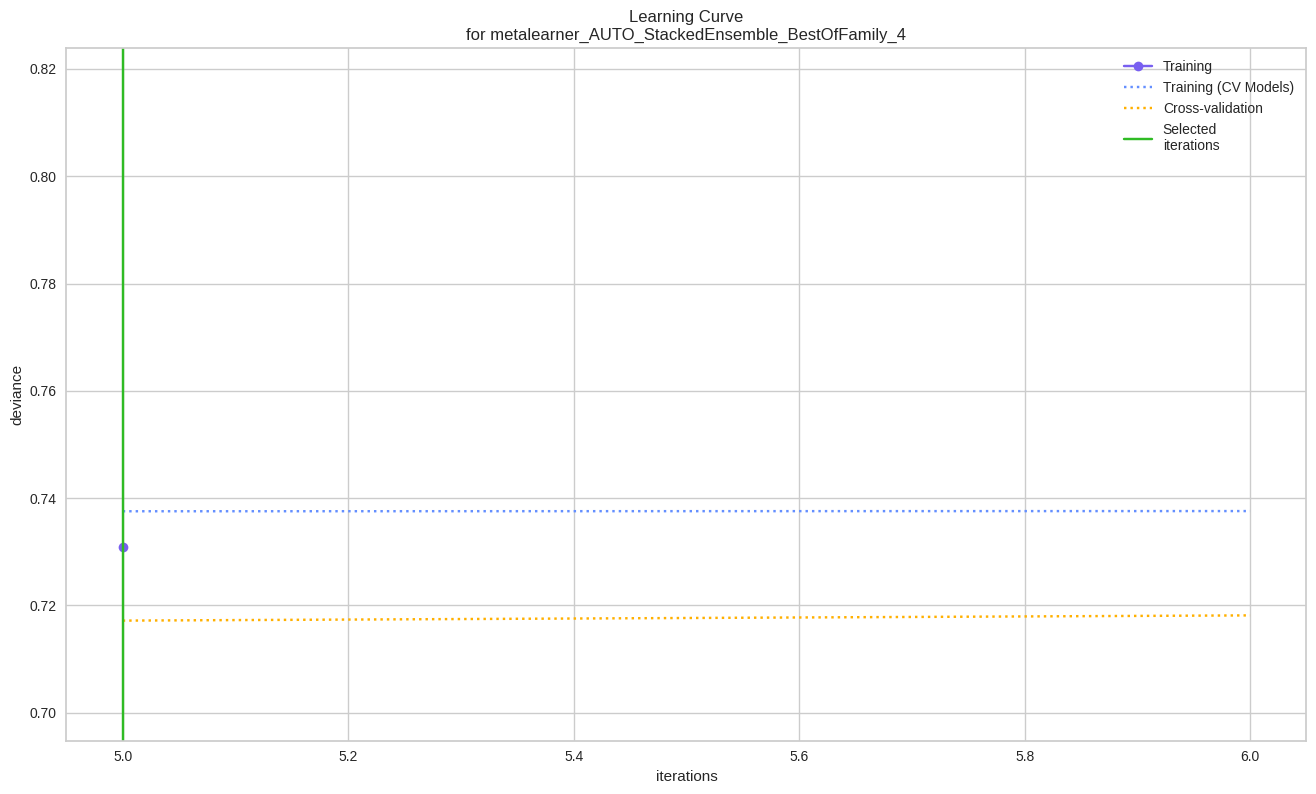

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

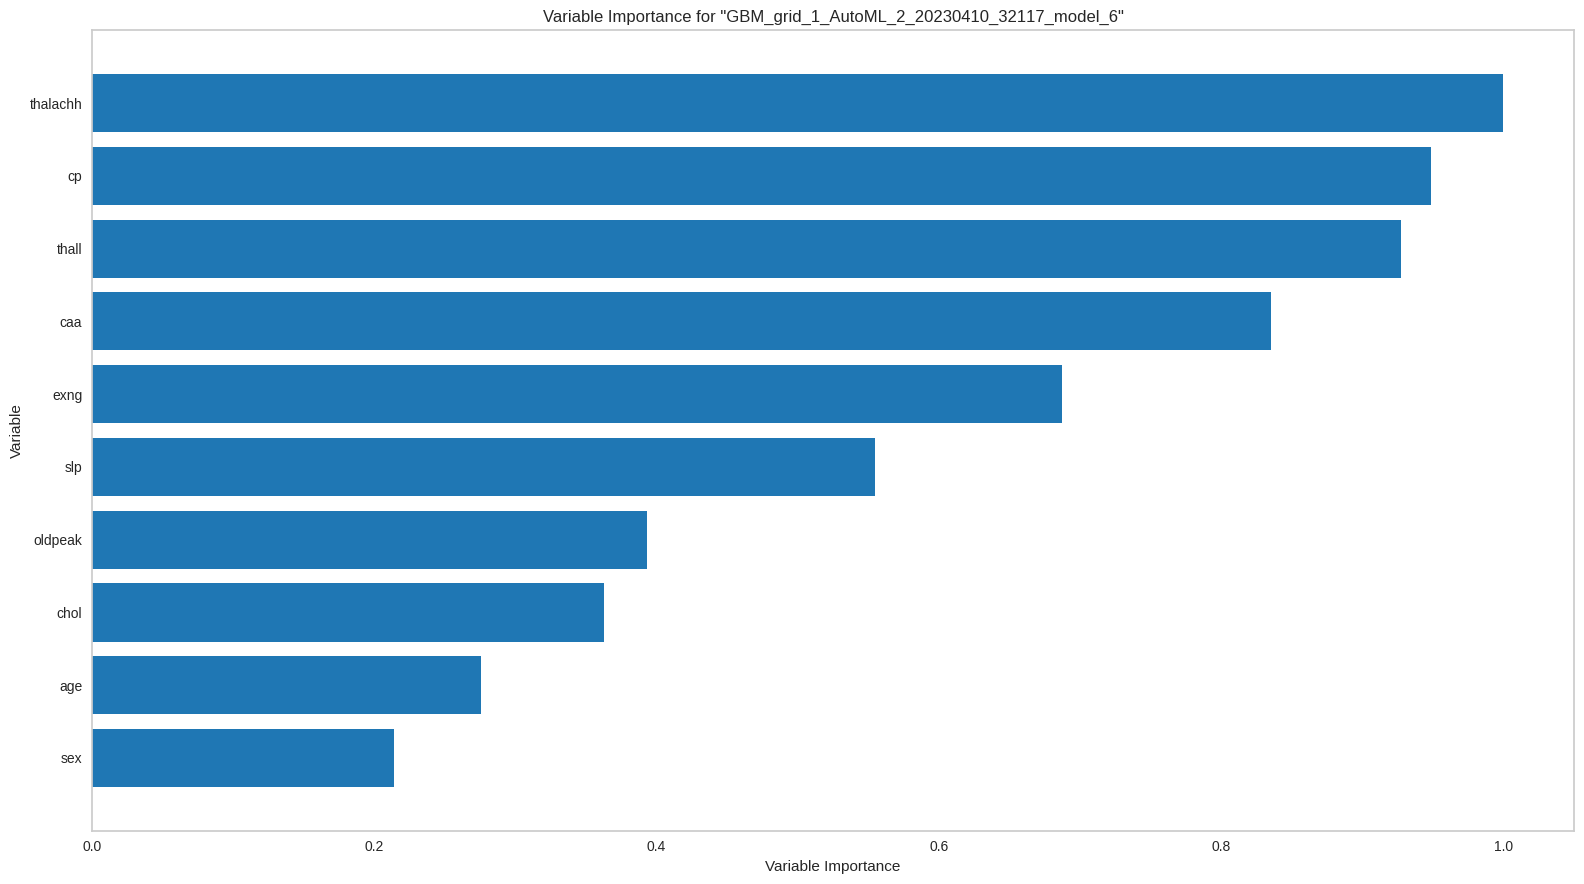

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

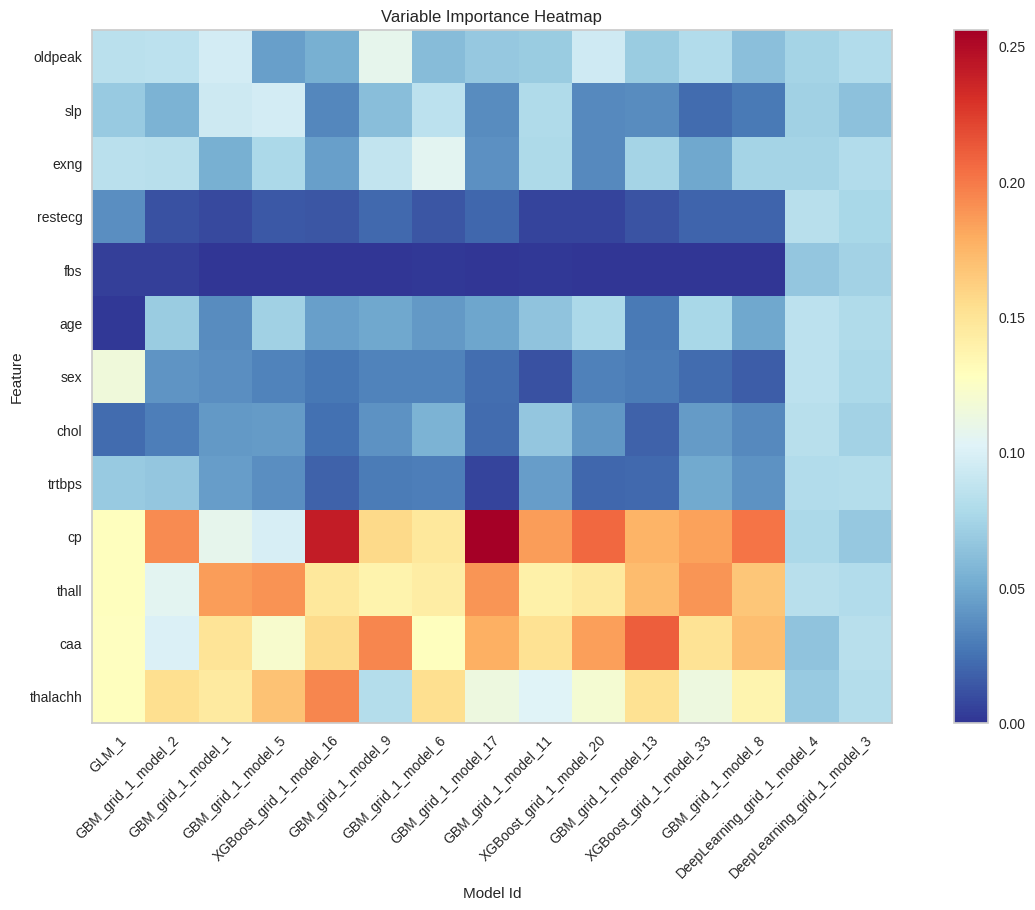

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

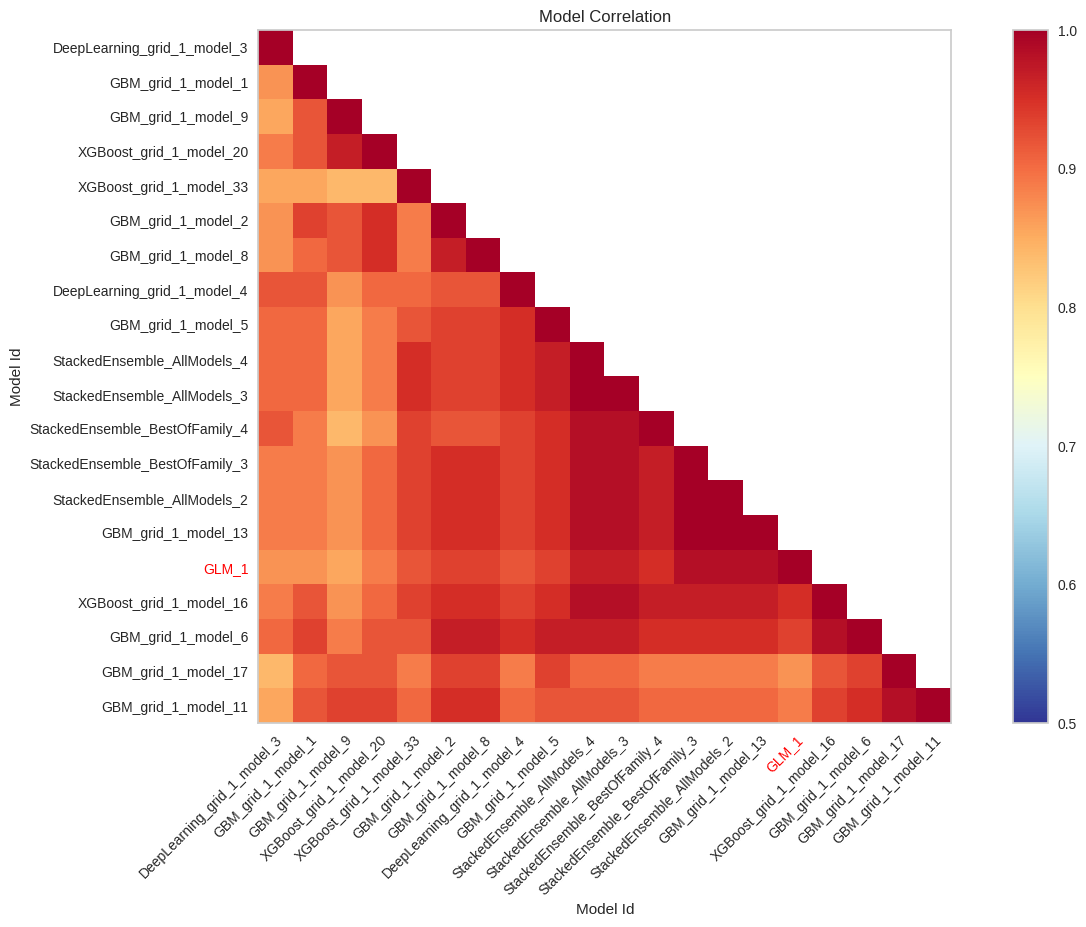

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

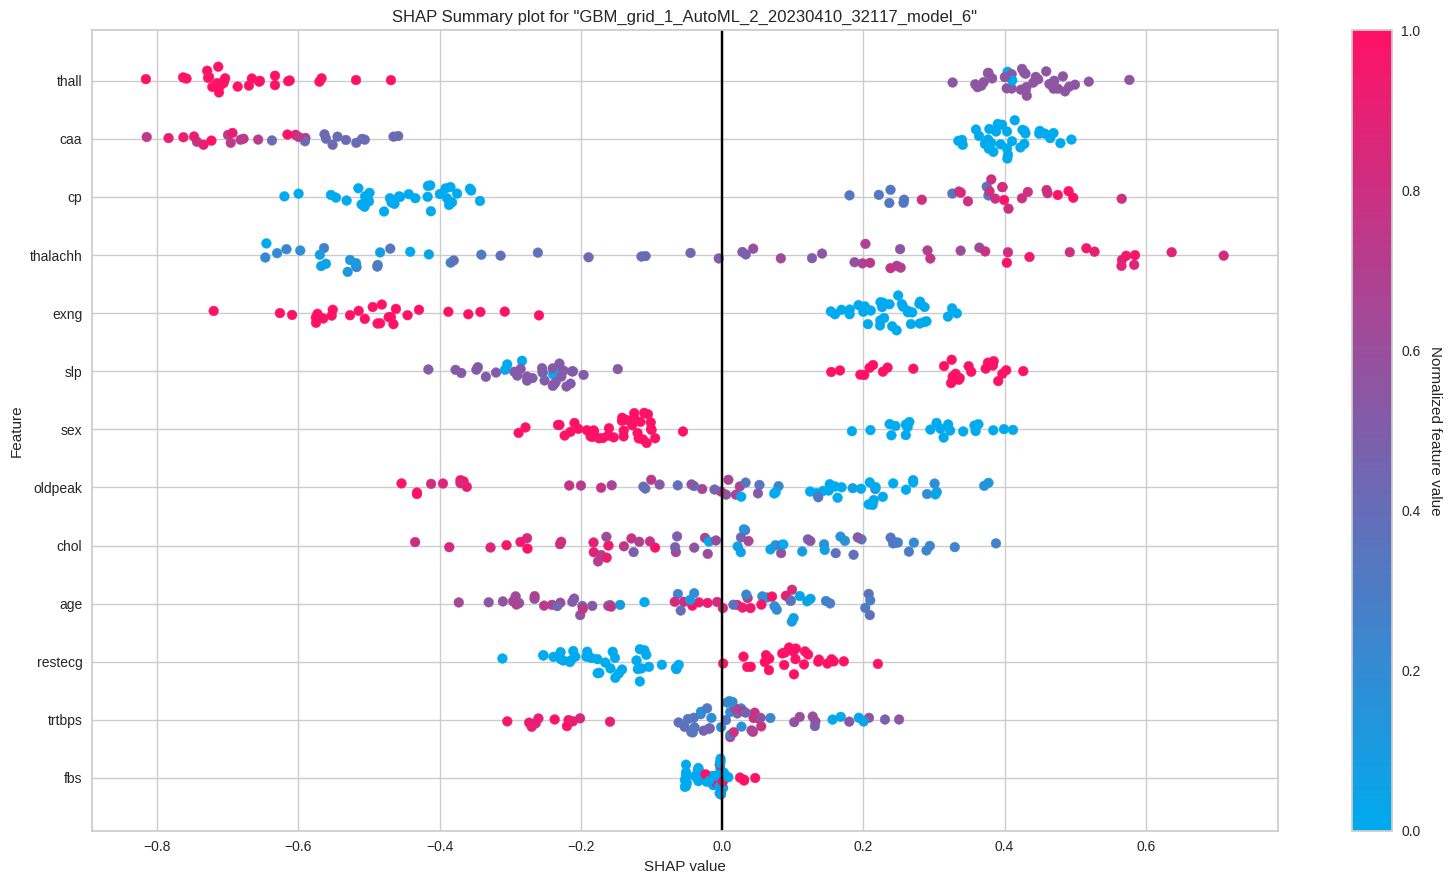

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

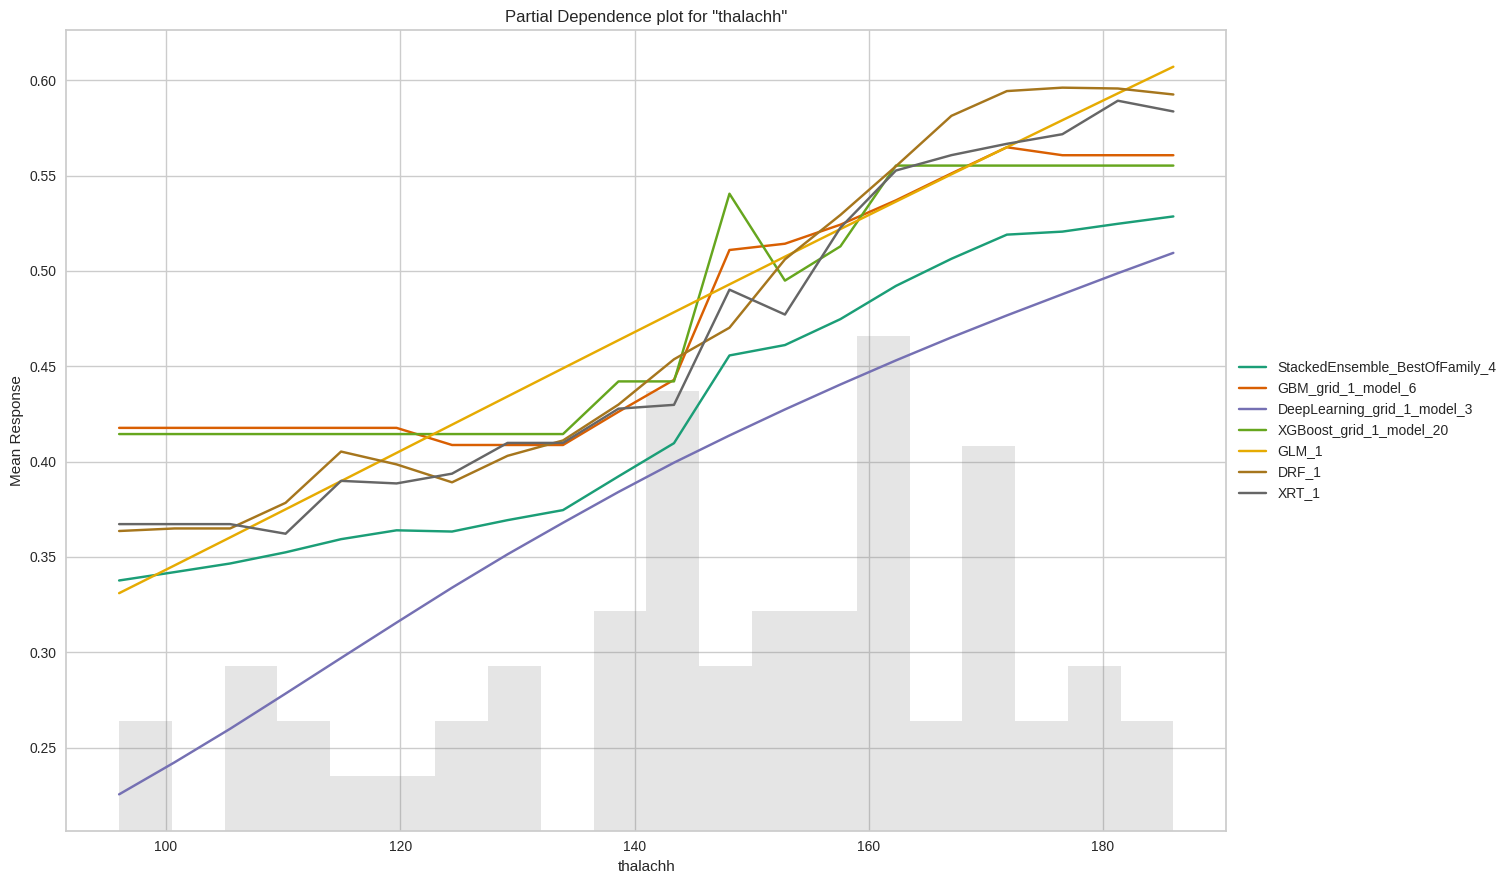

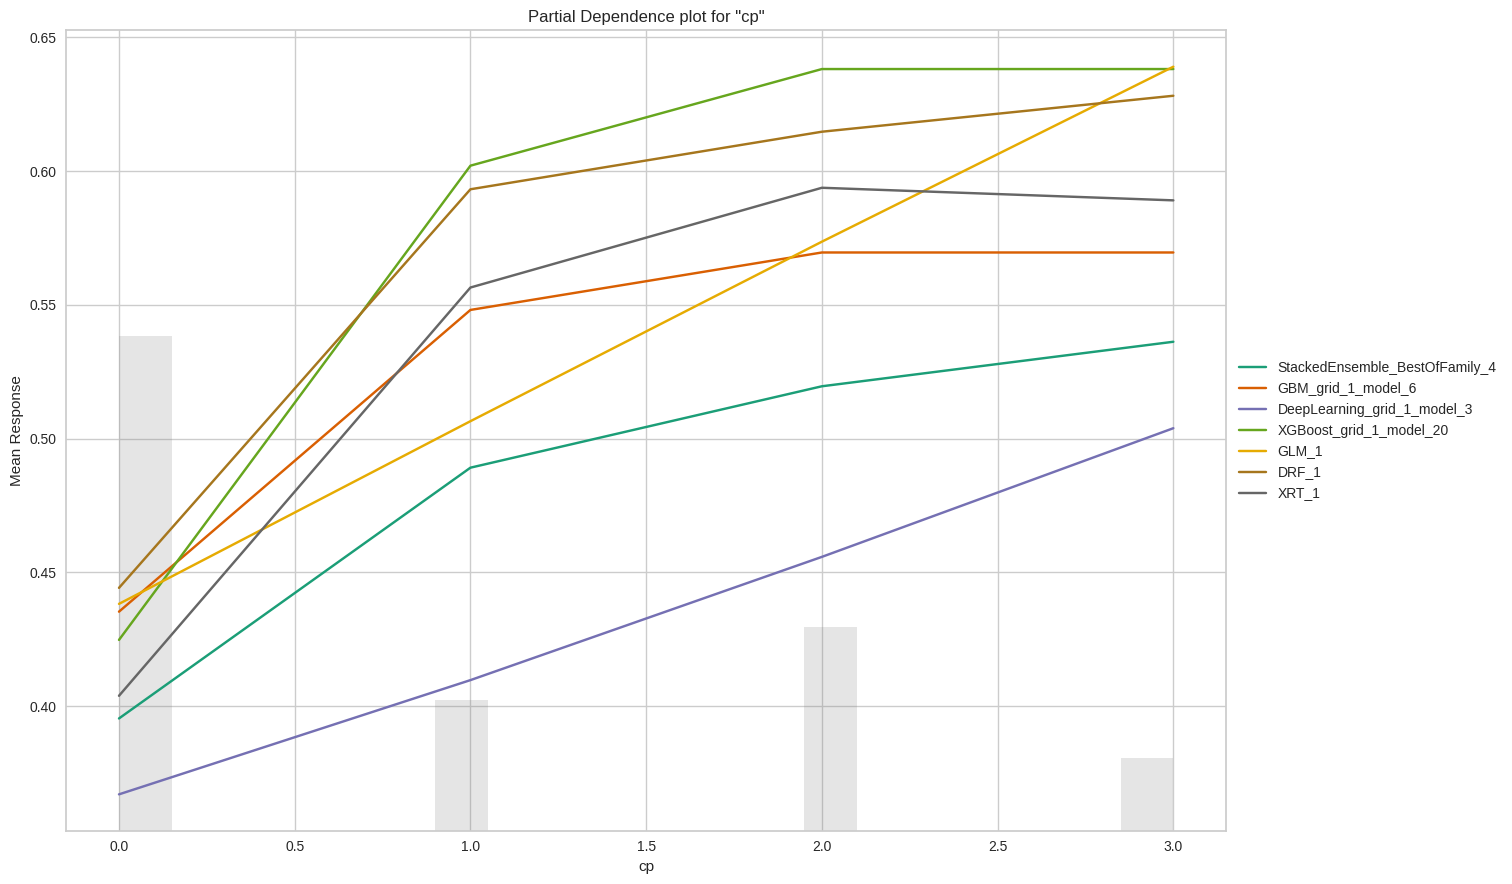

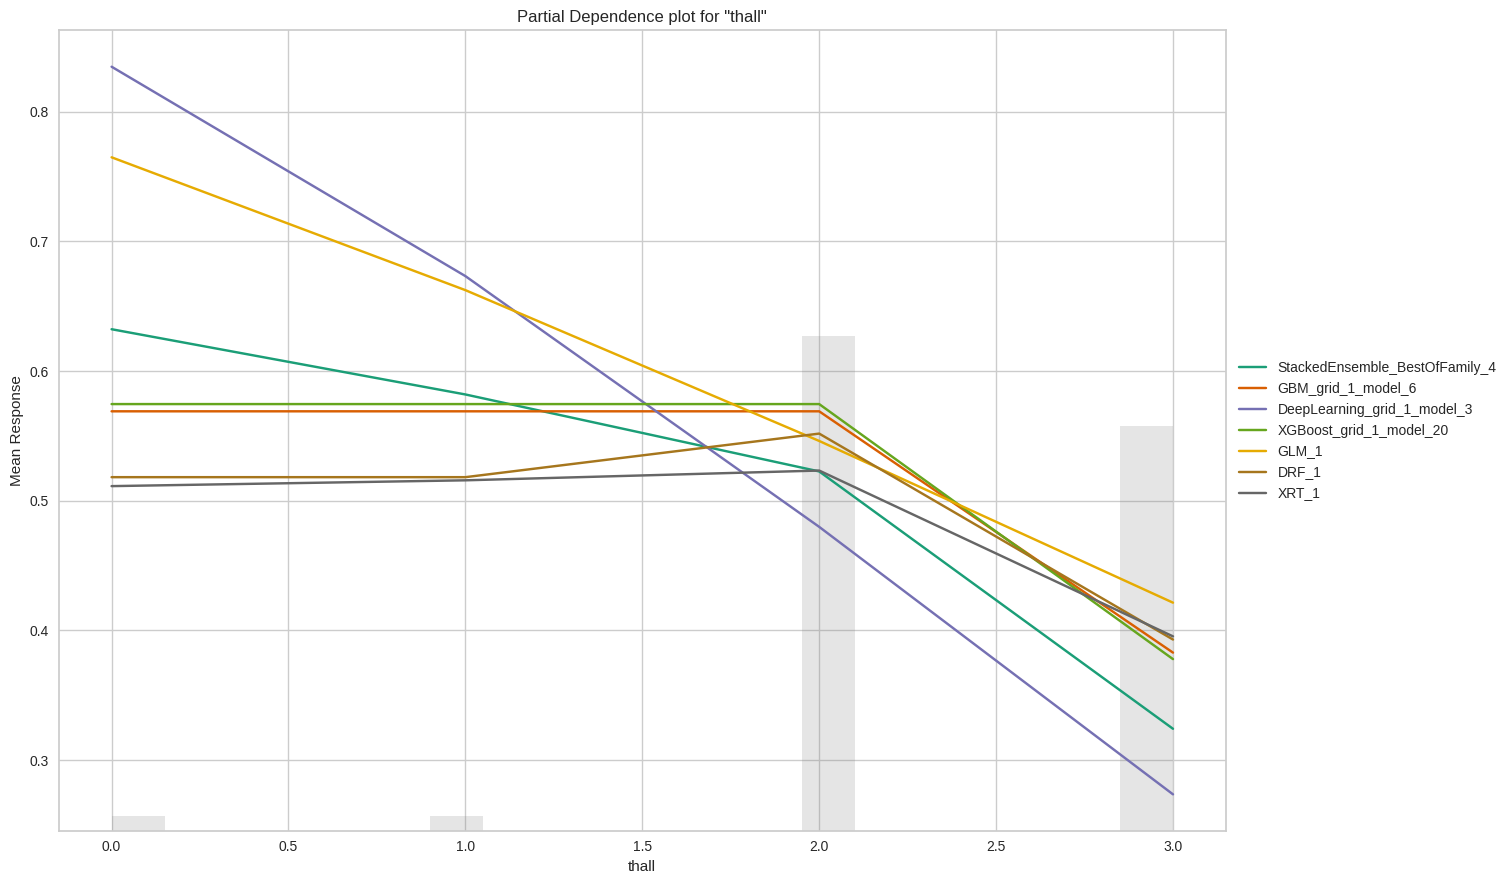

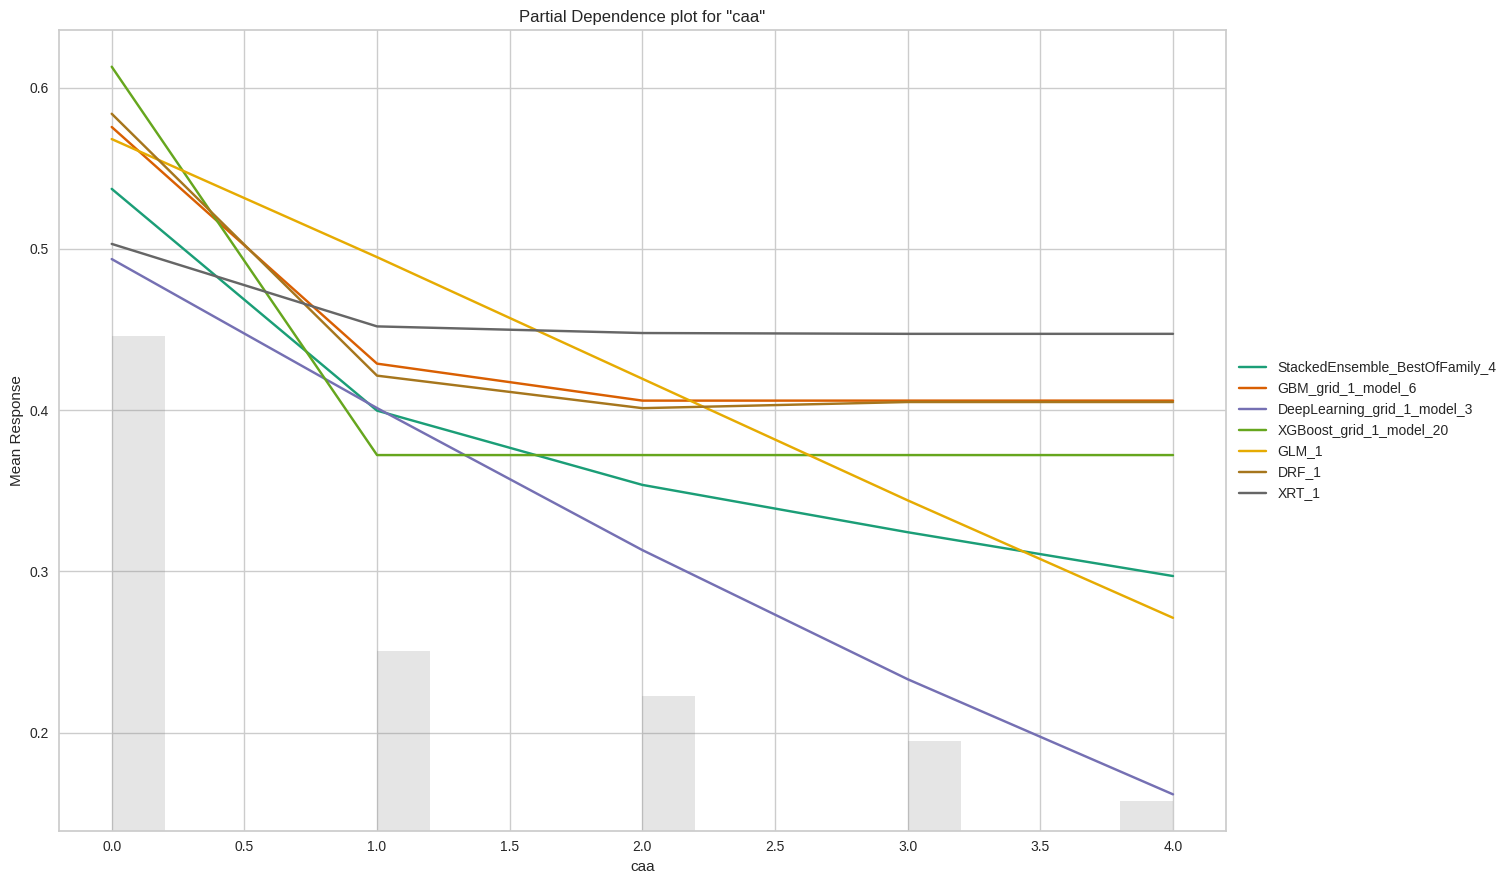

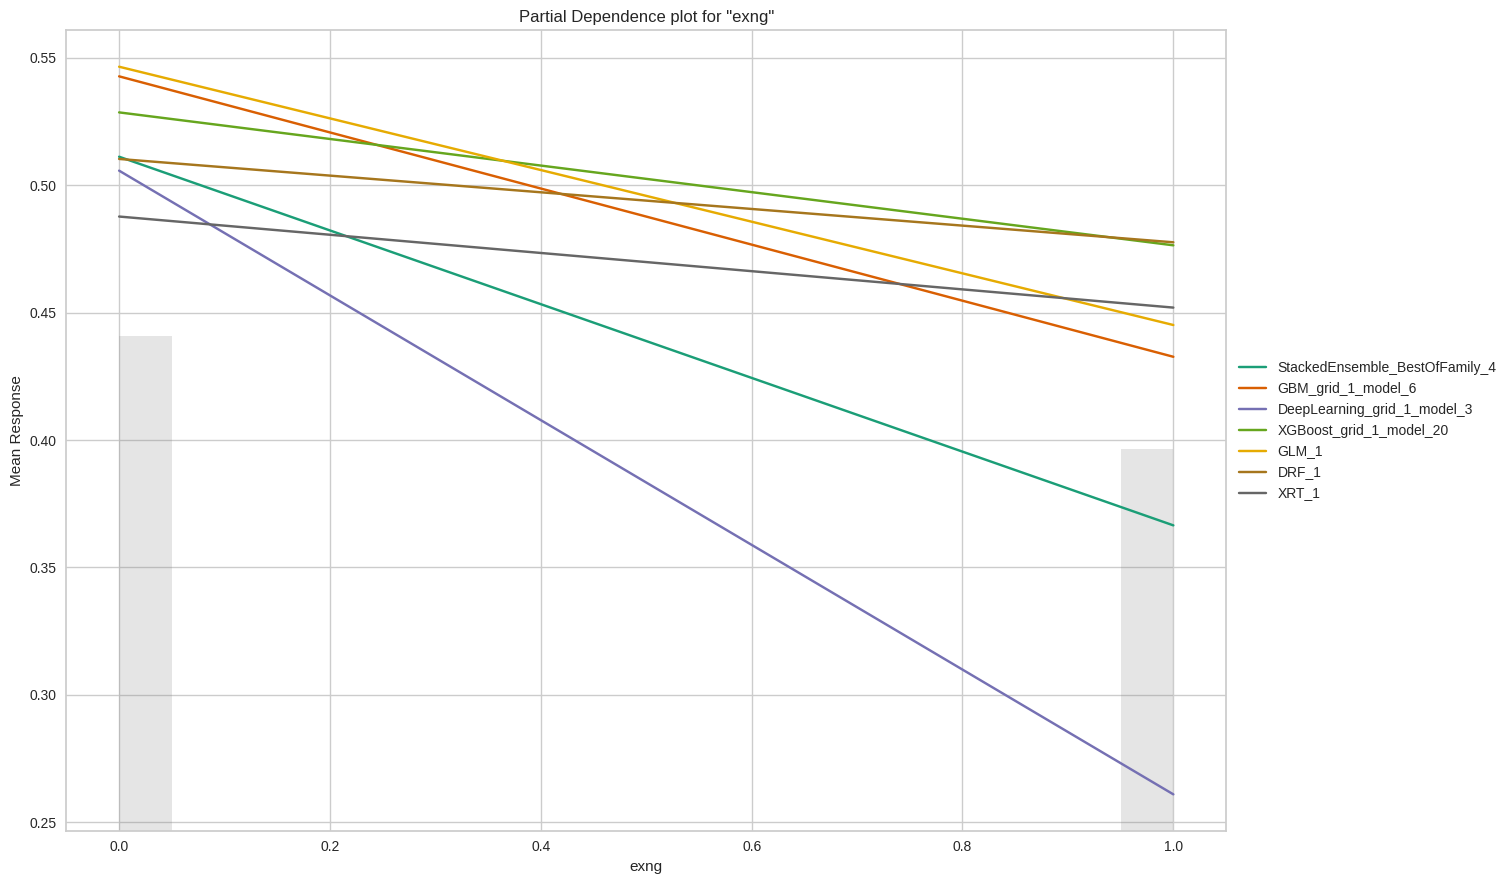

In [175]:
exa= aml.explain(test)

In [176]:
import statsmodels.formula.api as smf
import h2o
pandas_df = h2o.as_list(data)

In [177]:
results = smf.ols("output ~ age + sex + cp + trtbps + chol + fbs + restecg +thalachh + exng + oldpeak + slp + caa + thall",
data=pandas_df,
).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 output   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     23.85
Date:                Mon, 10 Apr 2023   Prob (F-statistic):           1.49e-38
Time:                        03:29:15   Log-Likelihood:                -108.28
No. Observations:                 303   AIC:                             244.6
Df Residuals:                     289   BIC:                             296.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8289      0.293      2.830      0.005       0.252       1.405
age           -0.0008      0.003     -0.304      0.761      -0.006       0.004
sex           -0.1960      0.047     -4.157      0.000      -0.289      -0.103
cp             0.1127      0.022      5.036      0.000       0.069       0.157
trtbps        -0.0020      0.001     -1.583      0.114      -0.004       0.000
chol          -0.0004      0.000     -0.838      0.403      -0.001       0.000
fbs            0.0174      0.060      0.291      0.771      -0.100       0.135
restecg        0.0498      0.040      1.249      0.213      -0.029       0.128
thalachh       0.0030      0.001      2.671      0.008       0.001       0.005
exng          -0.1440      0.051     -2.804      0.005      -0.245      -0.043
oldpeak       -0.0588      0.023     -2.564      0.011      -0.104      -0.014
slp            0.0790      0.042      1.863      0.063      -0.004       0.162
caa           -0.1006      0.022     -4.603      0.000      -0.144      -0.058
thall         -0.1190      0.036     -3.339      0.001      -0.189      -0.049
==============================================================================
Omnibus:                        6.751   Durbin-Watson:                   1.032
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                6.958
Skew:                          -0.361   Prob(JB):                       0.0308
Kurtosis:                       2.824   Cond. No.                     4.68e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [178]:
train, validate, test = np.split(
    pandas_df.sample(frac=1, random_state=316), [int(0.6 * len(data)), int(0.8 * len(data))]
)

train = h2o.H2OFrame(train)
validate = h2o.H2OFrame(validate)
test = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [179]:
gbm_parameters = {
    "learn_rate": [i * 0.01 for i in range(1, 11)],
    "max_depth": list(range(2, 11)),
    "sample_rate": [i * 0.1 for i in range(5, 11)],
    "col_sample_rate": [i * 0.1 for i in range(1, 11)],
}

In [180]:
search_criteria = {"strategy": "RandomDiscrete", "max_models": 36, "seed": 1}

In [182]:
gbm_grid2 = H2OGridSearch(
    model=H2OGradientBoostingEstimator,
    grid_id="gbm_grid2",
    hyper_params=gbm_parameters,
    search_criteria=search_criteria,
)



In [185]:
#gbm_grid2.train(
 #   x=predictor, y=response, training_frame=train, validation_frame=validate, ntrees=100, seed=1)


In [186]:
gbm_gridperf2 = gbm_grid2.get_grid(sort_by="residual_deviance", decreasing=False)
gbm_gridperf2

Hyper-Parameter Search Summary: ordered by increasing residual_deviance
     col_sample_rate      learn_rate    max_depth    sample_rate         model_ids           residual_deviance
---  -------------------  ------------  -----------  ------------------  ------------------  -------------------
     0.2                  0.02          10.0         0.5                 gbm_grid2_model_25  0.1480061693621894
     0.1                  0.02          9.0          0.8                 gbm_grid2_model_16  0.14910705702857413
     0.30000000000000004  0.02          2.0          1.0                 gbm_grid2_model_20  0.1516401117501059
     0.5                  0.02          2.0          0.9                 gbm_grid2_model_35  0.15307349986665764
     0.5                  0.03          2.0          0.6000000000000001  gbm_grid2_model_26  0.1540303503533258
     0.1                  0.08          3.0          0.8                 gbm_grid2_model_13  0.1553161762853122
     0.2                  0.04          5.0          0.9                 gbm_grid2_model_29  0.15564394129882544
     0.5                  0.05          2.0          0.8                 gbm_grid2_model_27  0.1567162133653294
     0.9                  0.03          10.0         0.5                 gbm_grid2_model_21  0.15672987426462048
     0.8                  0.04          2.0          0.9                 gbm_grid2_model_4   0.15693487305545398
---  ---                  ---           ---          ---                 ---                 ---
     0.8                  0.03          9.0          0.9                 gbm_grid2_model_8   0.1734219306661025
     0.5                  0.05          7.0          0.9                 gbm_grid2_model_2   0.176301390239996
     0.9                  0.07          4.0          0.9                 gbm_grid2_model_17  0.18227335617289075
     0.8                  0.06          9.0          0.6000000000000001  gbm_grid2_model_30  0.18439562493370756
     0.7000000000000001   0.06          5.0          0.6000000000000001  gbm_grid2_model_14  0.18525013485198458
     0.5                  0.1           9.0          1.0                 gbm_grid2_model_7   0.18632290820123262
     0.9                  0.1           4.0          0.7000000000000001  gbm_grid2_model_15  0.18908470223844792
     0.9                  0.09          8.0          0.9                 gbm_grid2_model_36  0.1892670894771427
     0.9                  0.09          9.0          0.6000000000000001  gbm_grid2_model_3   0.1937176309615032
     0.5                  0.1           4.0          0.8                 gbm_grid2_model_33  0.1966194010951578
[36 rows x 7 columns]

**Conclusion**<br/>

A fundamental algorithm based on the logistic regression method to predict heart attack prediction was constructed. VIF, p-values and other tests were considered to ignore some of the independent variables. H20.ai framework was used to train and test the variables of the dataset of Heart attack analysis and Prediction. From the results shown it can be concluded that the proposed linear regression model can effectively analyze and predict the heart attack to some extent. Admittedly, the prediction accuracy is still limited at specific points, and the model still needs to be improved in further research. In further research into the corresponding models, different techniques like removing outliers and using ensemble or booster can help achieve better prediction.


## **Model Interpretability**<br/>

**What is Model Interpretability ?** <br/>
Model interpretability refers to the ability to understand how a machine learning model arrives at its predictions or decisions. In other words, it is the ability to explain the logic or reasoning behind a model's output in a way that humans can understand.<br/>

Interpretability is important because it allows us to understand how the model is making decisions, which in turn can help us identify biases, errors, or limitations in the model. It also enables us to gain trust in the model's predictions and to identify areas where the model can be improved.<br/>

There are many techniques and approaches to achieving interpretability in machine learning models, ranging from simple methods such as feature importance analysis, to more complex methods such as model-specific visualization techniques and rule extraction algorithms.<br/>

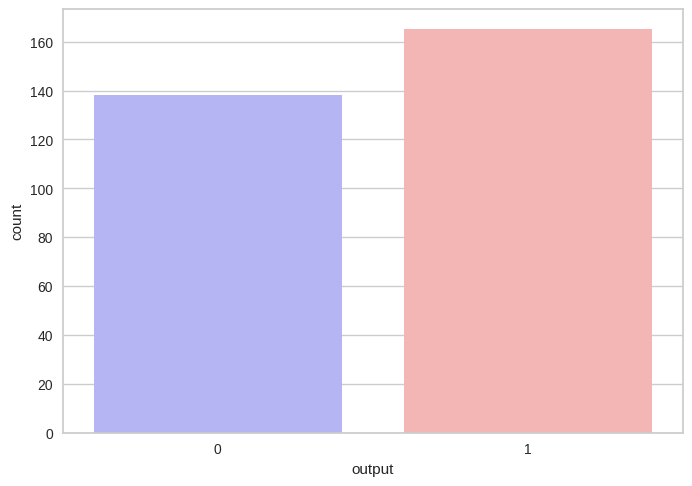

In [187]:
sns.countplot(x="output",data=df,palette="bwr")
plt.show()

Using countplot() method is used to Show the counts of observations in each categorical bin using bars. <br/>
Parameters : This method is accepting the following parameters that are described below: x, y: This parameter take names of variables in data or vector data, optional, Inputs for plotting long-form data.

In [195]:
y=df.output
X=df.drop("output",axis=1)
X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=0.7)

Since the dataset is of classification type, We're using Logistic regression. <br/>
LogisticRegression is a machine learning model used for binary classification problems, which means it's used to predict one of two possible outcomes (e.g., yes or no, true or false). The solver parameter specifies the algorithm used to optimize the model parameters, and the max_iter parameter specifies the maximum number of iterations for the solver to converge to a solution.<br/>

Specifically, the solver parameter is set to "lbfgs", which stands for Limited-memory Broyden–Fletcher–Goldfarb–Shanno. This is an optimization algorithm that uses an approximation of the Hessian matrix to update the model parameters. It's generally a good choice for small to medium-sized datasets.<br/>

The max_iter parameter is set to 500, which means that the solver will iterate at most 500 times to find the optimal solution. If the algorithm has not converged after 500 iterations, it will stop and return the current best solution. Increasing max_iter can sometimes improve model performance, but it can also increase the training time and may lead to overfitting.<br/>

In [196]:
lr= LogisticRegression(solver='lbfgs',max_iter=500)
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Because of the logit function, logistic regression coefficients represent the log odds that an observation is in the target class (“1”) given the values of its X variables. Thus, these log odd coefficients need to be converted to regular odds in order to make sense of them. Happily, this is done by simply exponentiating the log odds coefficients, which you can do with np.exp():

In [190]:
log_odds=lr.coef_[0]

In [197]:
pd.DataFrame(log_odds, 
             X_train.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

coef
cp        0.721549
restecg   0.586610
fbs       0.456664
slp       0.236355
thalachh  0.032105
age       0.014749
chol     -0.002607
trtbps   -0.025137
caa      -0.552572
oldpeak  -0.597500
thall    -0.857756
exng     -0.890111
sex      -0.955199

In [192]:
odds = np.exp(lr.coef_[0])
pd.DataFrame(odds, 
             X_train.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

coef
cp        2.057618
restecg   1.797883
fbs       1.578798
slp       1.266624
thalachh  1.032626
age       1.014858
chol      0.997397
trtbps    0.975176
caa       0.575468
oldpeak   0.550185
thall     0.424113
exng      0.410610
sex       0.384736

So, as variable cp (again, chest pain) increases by one unit, the odds of getting the heart attack represented in the observation are in the target class (“1”) are over 2.51x as large as the odds that they won’t be in the target class. On the other hand, as caa increases by one unit, the odds of getting heart attack are in the target class are only 0.27. For odds less than 1 (our negative coefficients), we can take 1/odds to make even better sense of them. So as caa increases by 1, the odds of getting heart-attack is NOT in the target class are 1/0.27 or 2.51x (ominous!) as likely as the odds that it IS in the target class.

In [193]:
explainer= shap.LinearExplainer(lr,X_train)
shap_values= explainer.shap_values(X_train)

**SHAP analysis on the models from steps 1** <br/>
shap.summary_plot(shap_values, X_train) is a function call in the Python package SHAP (SHapley Additive exPlanations) that generates a summary plot for a given set of SHAP values and corresponding input features.<br/> 

SHAP values are a way to explain the output of a machine learning model by assigning a numerical value to each input feature, indicating how much that feature contributes to the model's prediction. The SHAP values are calculated based on the Shapley value concept from cooperative game theory.<br/> 

In the shap.summary_plot function call, shap_values is a matrix of SHAP values for the training set X_train. The X_train matrix contains the input features used to train the machine learning model. The summary plot shows the global feature importance of each feature, sorted by their mean absolute SHAP value.<br/> 

The summary plot consists of a horizontal bar chart with each bar representing a single input feature. The color of the bar indicates the direction of the feature's impact on the model's prediction, with red indicating positive impact and blue indicating negative impact. The length of the bar indicates the magnitude of the feature's impact on the model's prediction, with longer bars indicating larger impacts.<br/> 

The summary plot also includes a vertical line for each feature, showing the range of values for that feature in the training set. This can help identify any nonlinear relationships between the input features and the model's prediction.<br/> 

Overall, the shap.summary_plot function call is a useful tool for visualizing the global feature importance of a machine learning model and understanding how different input features contribute to the model's prediction.<br/>






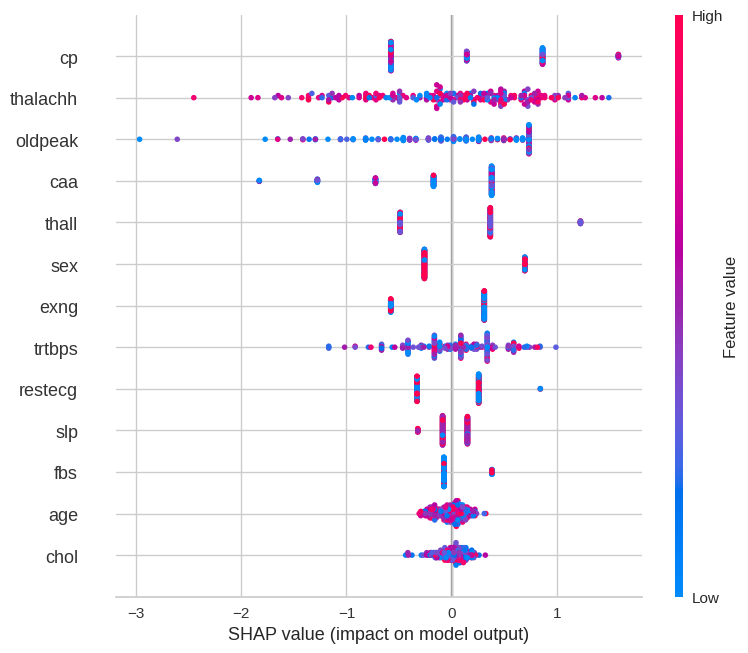

In [198]:
shap.summary_plot(shap_values,X_train)

In [199]:
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

[Text(0.5587121212121212, 0.9545454545454546, 'x[2] <= 0.5\nentropy = 0.996\nsamples = 212\nvalue = [98, 114]'),
 Text(0.3977272727272727, 0.8636363636363636, 'x[11] <= 0.5\nentropy = 0.831\nsamples = 99\nvalue = [73, 26]'),
 Text(0.2803030303030303, 0.7727272727272727, 'x[9] <= 1.5\nentropy = 0.996\nsamples = 43\nvalue = [20, 23]'),
 Text(0.19696969696969696, 0.6818181818181818, 'x[3] <= 131.0\nentropy = 0.896\nsamples = 32\nvalue = [10, 22]'),
 Text(0.12121212121212122, 0.5909090909090909, 'x[0] <= 42.0\nentropy = 0.993\nsamples = 20\nvalue = [9, 11]'),
 Text(0.09090909090909091, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.15151515151515152, 0.5, 'x[3] <= 123.0\nentropy = 0.937\nsamples = 17\nvalue = [6, 11]'),
 Text(0.09090909090909091, 0.4090909090909091, 'x[0] <= 46.5\nentropy = 0.503\nsamples = 9\nvalue = [1, 8]'),
 Text(0.06060606060606061, 0.3181818181818182, 'x[9] <= 0.4\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.030303030303030304, 0.22727272727272

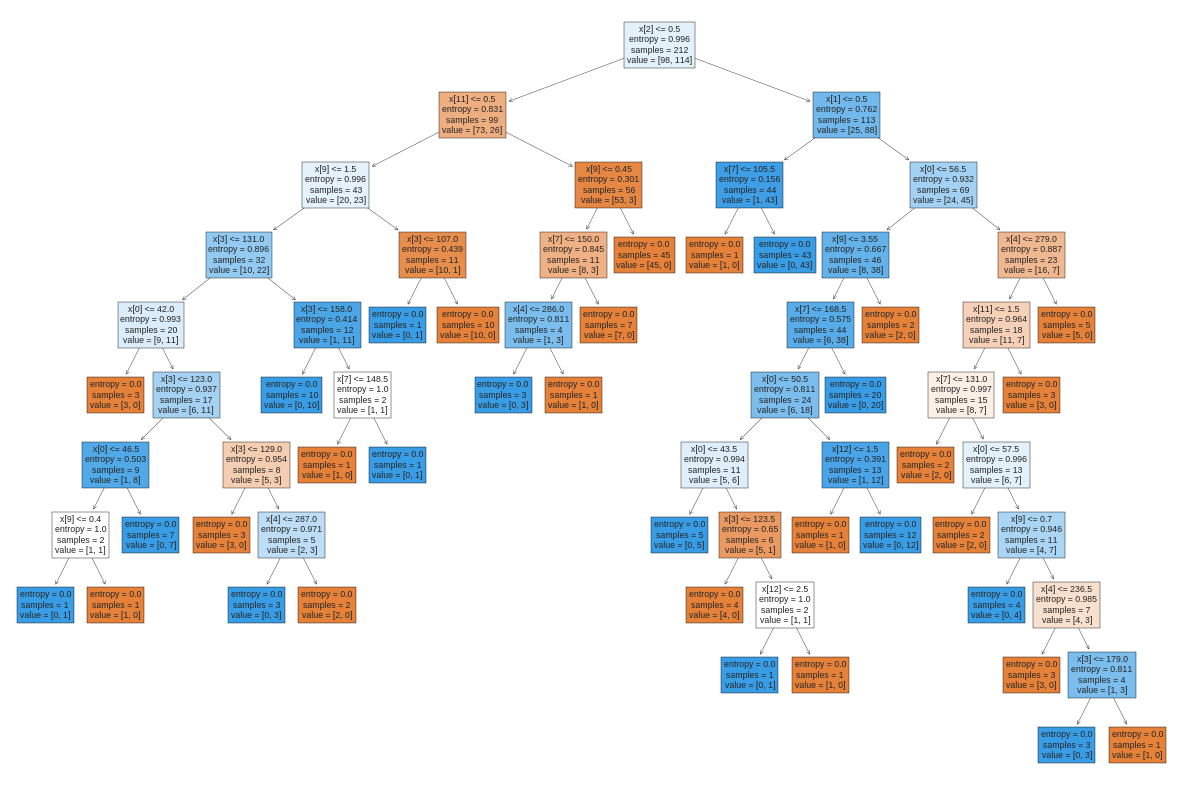

In [200]:
plt.figure(figsize=(15,10))
tree.plot_tree(dt,filled=True)

In [201]:
explainer= shap.TreeExplainer(dt)
shap_values= explainer.shap_values(X_train)

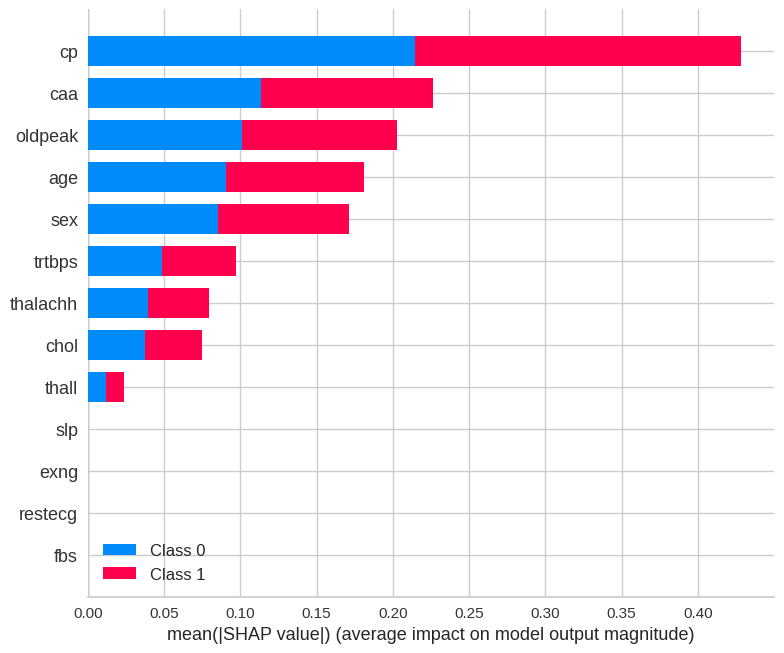

In [202]:
shap.summary_plot(shap_values,X_train)

**Intepreting the SHAP values:** <br/> 
This plot shows the cp, caa and thalachh are the important features in the given dataset

In [203]:
%pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [204]:
from pycaret.classification import *
clf1= setup(data=df,target="output")

In [205]:
clf2= setup(data=df,target="output",session_id=1,normalize=True,transformation=True,remove_multicollinearity=True,multicollinearity_threshold=0.95)

In [206]:
compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

GaussianNB(priors=None, var_smoothing=1e-09)

Bearing in mind we have a classification experiment, we look at accuracy as a primary benchmark metric to identify which model is the best. Naive Bayes and Ridge Clasifier are the most superior performing models.

In [207]:
nb_model= create_model('nb',fold=10)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [208]:
hp_tune_df= tune_model(nb_model,optimize='F1')

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [209]:
best_model= compare_models(sort='Accuracy')

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

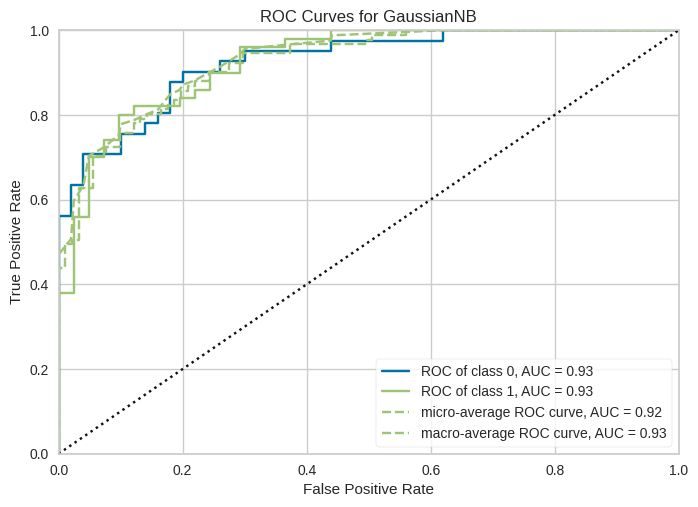

In [211]:
plot_model(best_model,plot='auc')

In [212]:
et_model=create_model('et',fold=10)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

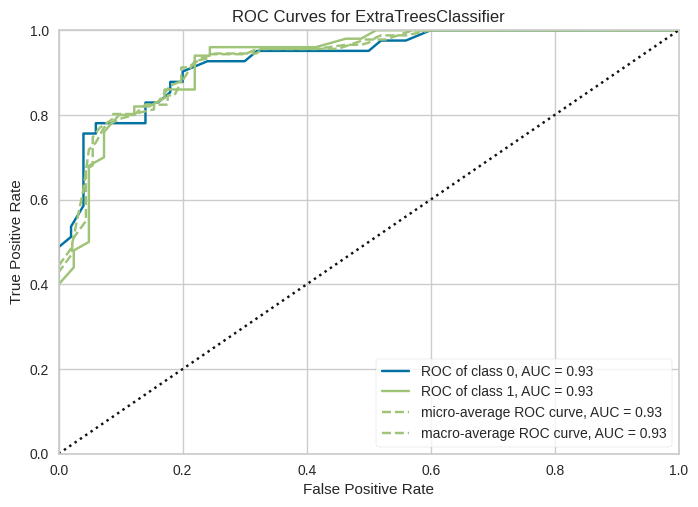

In [213]:
plot_model(et_model,plot='auc')

The above line of code throws error<br/>
**This makes sense because we cannot trigger an interpret funciton on a Gaussian NB. So lets try this on the first-best tree based classifier i.e Extra Trees Classifier.**

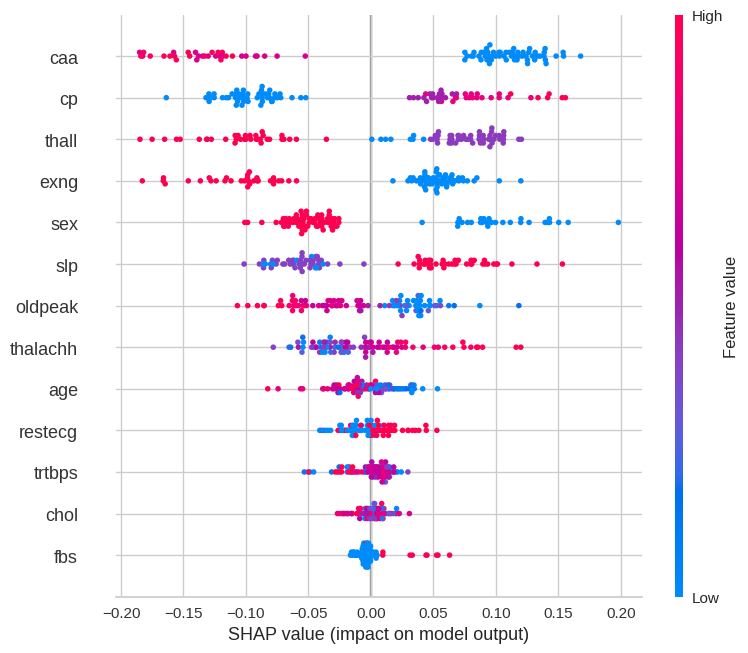

In [214]:
interpret_model(et_model)

**Intepreting the SHAP values:** <br/> 
the above plot says cp, slp, thalachh are the most important features, Since the above plot indicates cp,slp and thalachh having positive values to the value of output as 1

The partial dependence plots from the previous assignment shows that caa, cp, thalachh are the important features of the dataset

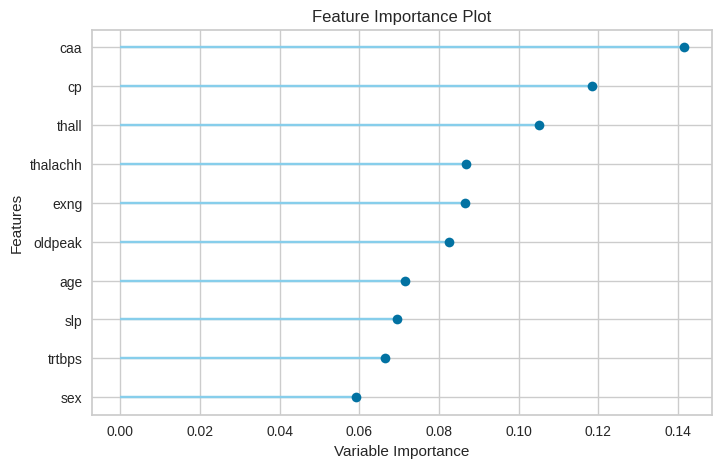

In [122]:
plot_model(et_model,plot='feature')

**Most important features for this neural network:**<br/>

caa: number of major vessels (0-3)<br/>
cp: Chest Pain type 

With this intuition, it's much easier to understand the <a href="https://christophm.github.io/interpretable-ml-book/shapley.html#the-shapley-value-in-detail"> math details of Shapely Values. </a>

##**Final Report**

<h3>Project Report: Heart Attack Analysis & Prediction Dataset</h3>

The dataset used for this assignment is about predicting the heart attck based on various features . The primary question that this analysis aims to answer is: **"Can we accurately predict the heart attack based on their features?"**

**2. What did you do?**<br/>

A: To answer this question, we followed a four-step process consisting of data cleaning, feature selection, modeling, and interpretability.<br/>

1.  Data Cleaning:<br/>
We started by cleaning the dataset to ensure that it is suitable for analysis. This included removing missing values, handling outliers, and transforming categorical variables into numerical values using one-hot encoding. We also performed feature scaling to ensure that all features have the same scale.<br/>

2.  Feature Selection:<br/>
Next, we selected the most relevant features for predicting the selling price of used cars using various techniques such as correlation analysis, feature importance, and recursive feature elimination. The final set of features caa,  thalachh, cp, oldpeak, slp<br/>

3.  Modeling:<br/>
We then built various machine learning models such as logistic regression, decision tree,  and gradient boosting, using the selected features. We used cross-validation to evaluate the performance of each model and selected the best performing model based on its mean absolute error and R-squared values.<br/>

4.  Interpretability:<br/>
Finally, we used SHAP (SHapley Additive exPlanations) to interpret the selected model and understand the contribution of each feature to the predicted selling price of used cars. SHAP values provide a unified measure of feature importance and allow us to identify the most significant factors that influence the heart attack prediction.

**3. How well did it work?**<br/>

A: Overall, our analysis did accurately predict the heart attack of a person based on their features. The best performing model was the gradient gbm. Our analysis also revealed that the most important features for predicting the caa,cp, thalachh, thall, oldpeak<br/>
[thlachh, age], [exng, cp], [oldpeak,slp] --> these pairs have multicollinearity

**4. What did you learn?**<br/>

A: In conclusion, this analysis demonstrated the importance of data cleaning, feature selection, modeling, and interpretability in building accurate and interpretable machine learning models. We also learned that the heart attack prediction is influenced by several factors, including the caa, cp, thalachh, old peak, slp , and that these factors can be used to predict the heart attack with maximum accuracy

**LICENSE** <br/>
MIT License <br/><br/>

Copyright (c) 2022 Devika Boddu<br/>

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.




**REFERENCES** <br/><br/>
1.   Sckit learn offcial documentation<br/>
2.   Refered Towards Data Science<br/>
3.   Eli5 official documentation<br/>
H20.ai- https://docs.h2o.ai/ <br/>
OLS Model- http://net-informations.com/ds/mla/ols.html <br/>
Linear Regression- https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/<br/>
Linear Regression Assumptions- https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-linear-regression/<br/>
Dataset-  https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset <br/>
Greeshma's AutoML Notebook - https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/CC_Kaggle_AutoML_Regression_Melbourne_Housing.ipynb <br/>
Professor's AutoML Notebook- https://github.com/nikbearbrown/AI_Research_Group/tree/main/Kaggle_Datasets/AutoML <br/>
https://pycaret.org/<br/>